### Demographics API

Below we have the code that retrieves the data from the  Mechanical Turk Tracker Demographics API.

In [6]:
# Render our plots inline
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
!sudo -H pip3 install -U pip matplotlib pandas numpy seaborn xlwt

In [7]:
import pandas as pd
import matplotlib
import numpy as np
import seaborn as sns

In [8]:

df = pd.read_csv("mturk_surveys.csv")
df.drop(df.columns[0], axis=1, inplace=True) # drop the "index" column
# We now transform our API answer into a flat table
# and set the right data types
df["hit_answered_date"]=pd.to_datetime(df["hit_answered_date"])
df["hit_creation_date"]=pd.to_datetime(df["hit_creation_date"])
df["household_income"]=df["household_income"].astype("category")
df["household_size"]=df["household_size"].astype("category")
df["location_country"]=df["location_country"].astype("category")
df["marital_status"]=df["marital_status"].astype("category")
df['date'] = pd.to_datetime(df['hit_answered_date'].apply(lambda x : x.date()))
df['time'] = df['hit_answered_date'].dt.round('min').apply(lambda x : x.time())
df.dtypes

gender                             object
hit_answered_date          datetime64[ns]
hit_creation_date          datetime64[ns]
household_income                 category
household_size                   category
location_city                      object
location_country                 category
location_region                    object
marital_status                   category
post_to_completion_secs           float64
worker_id                          object
year_of_birth                       int64
date                       datetime64[ns]
time                               object
dtype: object

In [9]:
import datetime
import time

minDate = min(df['hit_answered_date'])
maxDate = max(df['hit_answered_date'])

# The following are for setting up the x-axis in the plots that
# show demographics over time
min_x = minDate.toordinal()
max_x = maxDate.toordinal()
ticks = 6
steps = (max_x-min_x)/ticks

days = (maxDate - minDate).days
print(minDate)
print(maxDate)
print(days)

2015-03-26 11:47:28.877000
2019-06-06 22:41:09.236000
1533


In [10]:
df['ttl'] = (df['hit_answered_date'] - df['hit_creation_date']).dt.total_seconds()

In [11]:
df['hour'] = df['hit_creation_date'].dt.hour

In [12]:
df['dow'] = df['hit_creation_date'].dt.dayofweek

In [13]:
df.pivot_table(
    index=['dow','hour'],
    values='ttl',
    aggfunc = np.median
)

# sns.violinplot(data=df, x='hour', y='ttl', ylim=(0,100))

ttl
dow hour          
0.0 0.0   240.9290
    1.0   230.7210
    2.0   219.8390
    3.0   275.5610
    4.0   284.9930
    5.0   324.0990
    6.0   342.1095
    7.0   434.0470
    8.0   519.4070
    9.0   597.7130
    10.0  517.2440
    11.0  422.5865
    12.0  391.4090
    13.0  392.1030
    14.0  392.9230
    15.0  324.1400
    16.0  404.6690
    17.0  330.5200
    18.0  355.6710
    19.0  332.2950
    20.0  318.6940
    21.0  391.0630
    22.0  356.4250
    23.0  390.6000
1.0 0.0   354.5305
    1.0   312.4070
    2.0   277.5180
    3.0   298.3080
    4.0   347.4010
    5.0   353.3695
...            ...
5.0 18.0  357.2160
    19.0  307.8340
    20.0  368.0560
    21.0  388.0265
    22.0  355.8080
    23.0  284.6770
6.0 0.0   308.3110
    1.0   257.2740
    2.0   262.0025
    3.0   277.9510
    4.0   302.9740
    5.0   310.1955
    6.0   396.5770
    7.0   436.4175
    8.0   721.2015
    9.0   660.2180
    10.0  677.5370
    11.0  523.0630
    12.0  411.6450
    13.0  354.0650
    14.0  362.8290
    15.0  305.2850
    16.0  287.7420
    17.0  289.7950
    18.0  290.3620
    19.0  266.0695
    20.0  291.7480
    21.0  256.1890
    22.0  265.9180
    23.0  256.9050

[168 rows x 1 columns]

In [14]:
print(min_x)
print(max_x)

735683
737216


In [15]:
len(set(df.worker_id))

63418

In [16]:
# Fix a data quality issue
#fix = list(df[df.gender=='Female'].index)[0]
#df = df.set_value(fix, 'gender', 'female')

In [18]:
# df.head(5)

### Exploratory plots

In [ ]:
!sudo -H pip3 install -U matplotlib

In [19]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
mpl.__version__

'3.0.3'

In [22]:
# !sudo -H pip3 install -U seaborn

In [23]:
import seaborn as sns
sns.__version__

'0.9.0'

In [24]:
mpl.rc("figure", figsize=(16, 8))
mpl.rcParams.update({'font.size': 22})
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
sns.set_style("whitegrid")

#### Countries of the workers

In [25]:
# Let's see the top countries
country = 100* df['location_country'].value_counts() / len(df)

In [26]:
pd.DataFrame(country.head(30))

location_country
US         73.511522
IN         17.982985
CA          1.319479
GB          0.850753
IT          0.373220
DE          0.360351
PH          0.326483
VE          0.299389
FR          0.256039
BR          0.230977
ZZ          0.194400
ES          0.186949
MX          0.186271
AU          0.146308
KE          0.131406
AE          0.126665
RO          0.115150
JP          0.104989
TR          0.104989
TH          0.104312
NG          0.101603
NL          0.098893
ID          0.096184
RU          0.096184
PT          0.094152
GR          0.094152
MK          0.088733
IE          0.080605
NZ          0.073831
SG          0.071122

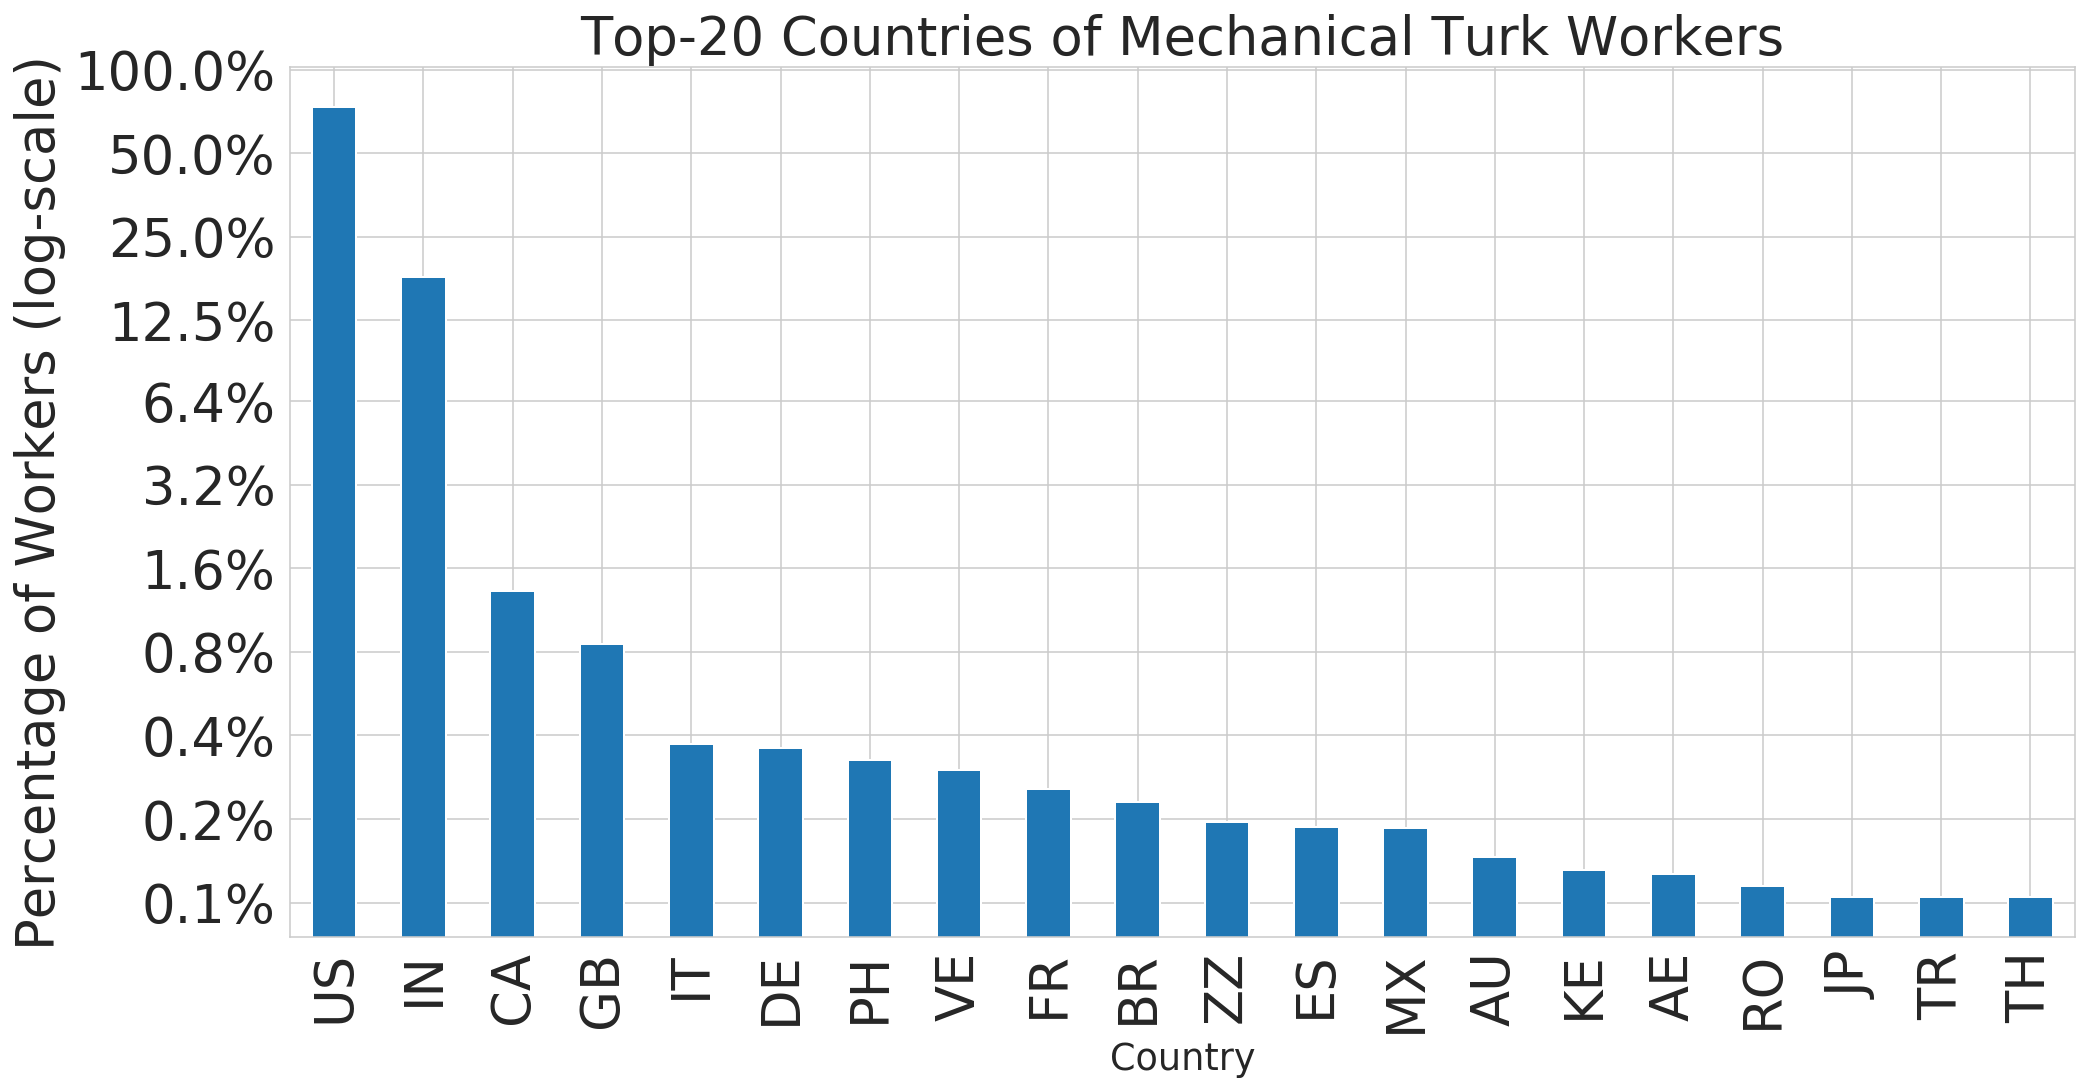

In [27]:
ax = country.head(20).plot.bar(log=True, fontsize='large', color=sns.color_palette(n_colors=1))
ax.set_title("Top-20 Countries of Mechanical Turk Workers", fontsize='large')
ax.set_xlabel("Country", fontsize='small')
ax.set_ylabel("Percentage of Workers (log-scale)", fontsize='large')

fmt = '%.1f%%' # Format you want the ticks, e.g. '40%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
ax.set_yticks([0.1, 0.2, 0.4, 0.8, 1.6, 3.2, 6.4, 12.5, 25, 50, 100])
#ax.yaxis.set_major_formatter(mtick.PercentFormatter())

fig = ax.get_figure()
fig.savefig('plots/countries.pdf', bbox_inches='tight')

In [28]:
country_table = pd.crosstab(index=df.date, columns=df.location_country, 
                            values='worker_id', aggfunc=np.count_nonzero, normalize='index')
# country_table

In [29]:
def time_plot(data, title, filename, confidence=True, legend=False):
        # Compute the mean, and the 10%, 25%, 75%, and 90% percentile
    # Values calculated over a rolling 30-day window
    # Plot lines are smoothed using a 7-day exponential weighted window
    m = data.rolling(window=30).mean().ewm(span=7).mean()
    s1 = data.rolling(window=30).quantile(quantile=0.25).ewm(span=7).mean()
    s2 = data.rolling(window=30).quantile(quantile=0.75).ewm(span=7).mean()
    #s3 = country_table['US'].rolling(window=30).quantile(quantile=0.1).ewm(span=7).mean()
    #s4 = country_table['US'].rolling(window=30).quantile(quantile=0.9).ewm(span=7).mean()

    ax = m.plot(fontsize='small')
    if confidence:
        ax = s1.plot(fontsize='small', color='#bbbbff', linestyle = '--', ax = ax)
        ax = s2.plot(fontsize='small', color='#bbbbff', linestyle = '--', ax = ax)
        
        
    #ax = s3.plot(fontsize='small', color='#eeeeff', linestyle = '--', ax = ax)
    #ax = s4.plot(fontsize='small', color='#eeeeff', linestyle = '--', ax = ax)

    ax.set_title(title, fontsize='large')
    ax.set_ylabel("Percentage", fontsize='small')
    ax.set_xlabel("Date", fontsize='small')
    
    fmt = '%3.1f%%' # Format you want the ticks, e.g. '40%'
    yticks = mtick.FormatStrFormatter(fmt)
    ax.yaxis.set_major_formatter(yticks)
    
    if legend:
        ax.legend( fontsize='small', fancybox=True, frameon = True)
        

            
          
    #ax.xaxis.set_ticks(np.arange(min_x, max_x, steps))
    #ax.yaxis.set_ticks(np.arange(0.55, 0.91, 0.05))
    fig = ax.get_figure()
    fig.savefig(filename, bbox_inches='tight')
    
    return ax


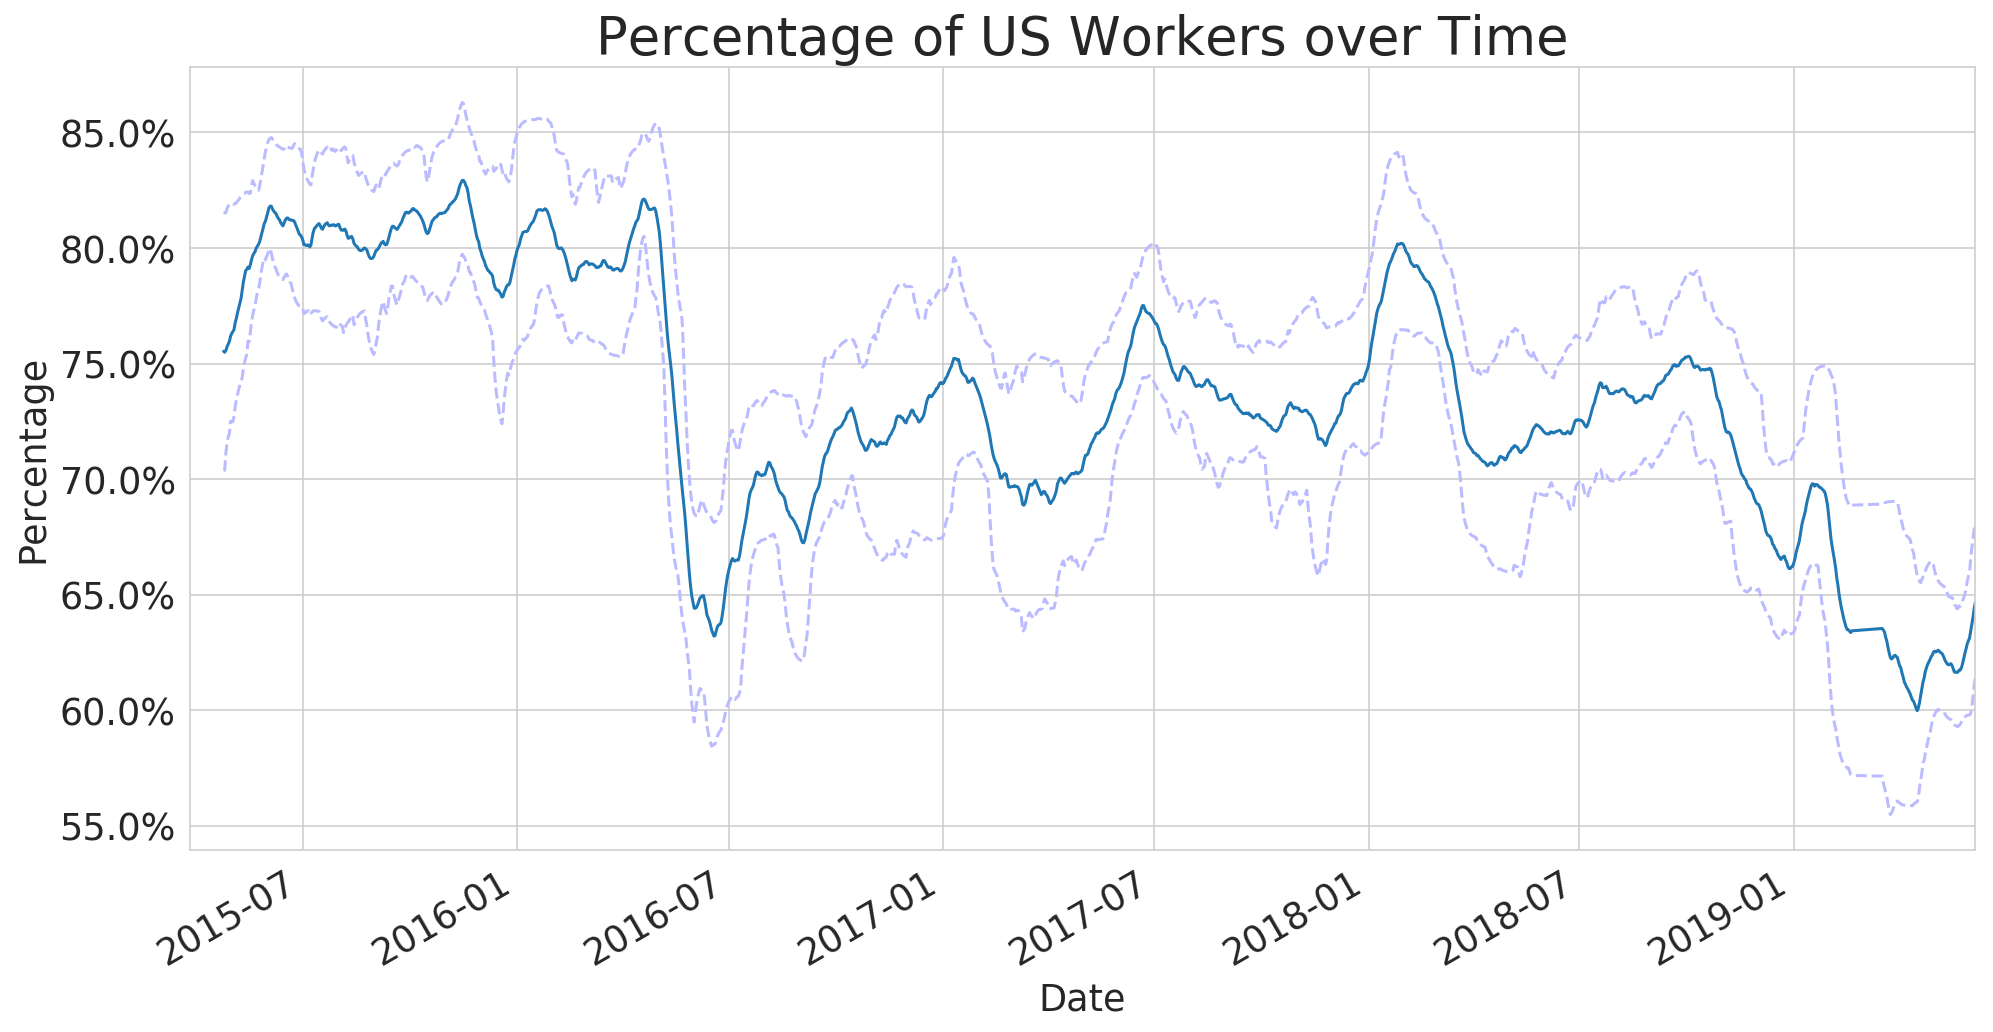

In [30]:
time_plot(100*country_table['US'], 'Percentage of US Workers over Time', 'plots/country-us.pdf')

In [32]:
country_table_time = pd.crosstab(index=df.time, 
                                 columns=df.location_country, 
                                 values='worker_id', 
                                 aggfunc=np.count_nonzero, 
                                 normalize='index')
country_table_time.sort_index(inplace=True)

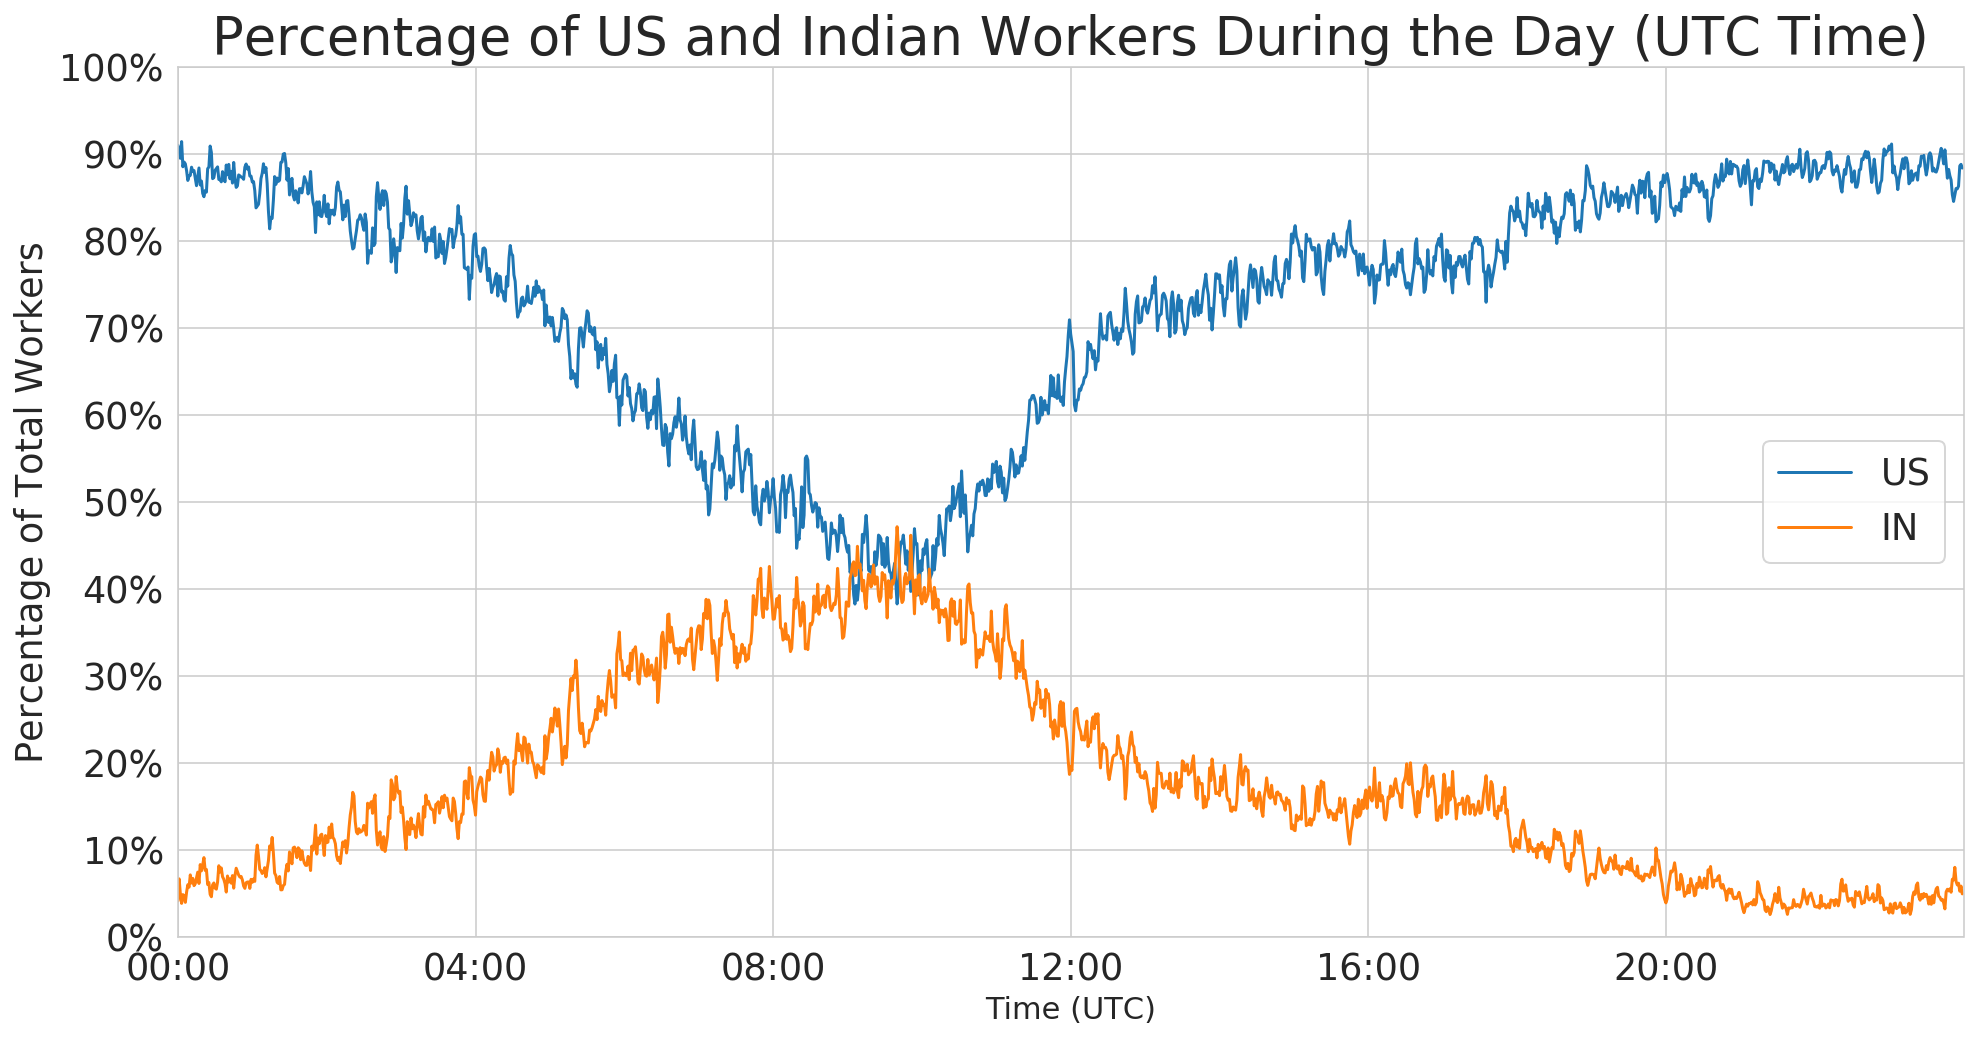

In [33]:
m = 100*country_table_time[['US','IN']].ewm(span=5).mean()

ax = m.plot( fontsize='small', xlim=[0,86400], ylim=[0,1])
ax.set_title("Percentage of US and Indian Workers During the Day (UTC Time)", fontsize='large')
ax.set_ylabel("Percentage of Total Workers", fontsize='small')
ax.set_xlabel("Time (UTC)", fontsize='x-small')
ax.xaxis.set_ticks(np.arange(0, 84400, 14400))
ax.yaxis.set_ticks(np.arange(0, 110, 10))
fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
    
ax.legend( fontsize='small')
fig = ax.get_figure()
fig.savefig('plots/country-usa-india-time-of-day.pdf', bbox_inches='tight')

In [38]:
# No significant periodicity
# from pandas.plotting import autocorrelation_plot
# data = country_table['US'].ewm(span=1).mean().diff()[1:]
# autocorrelation_plot(data)

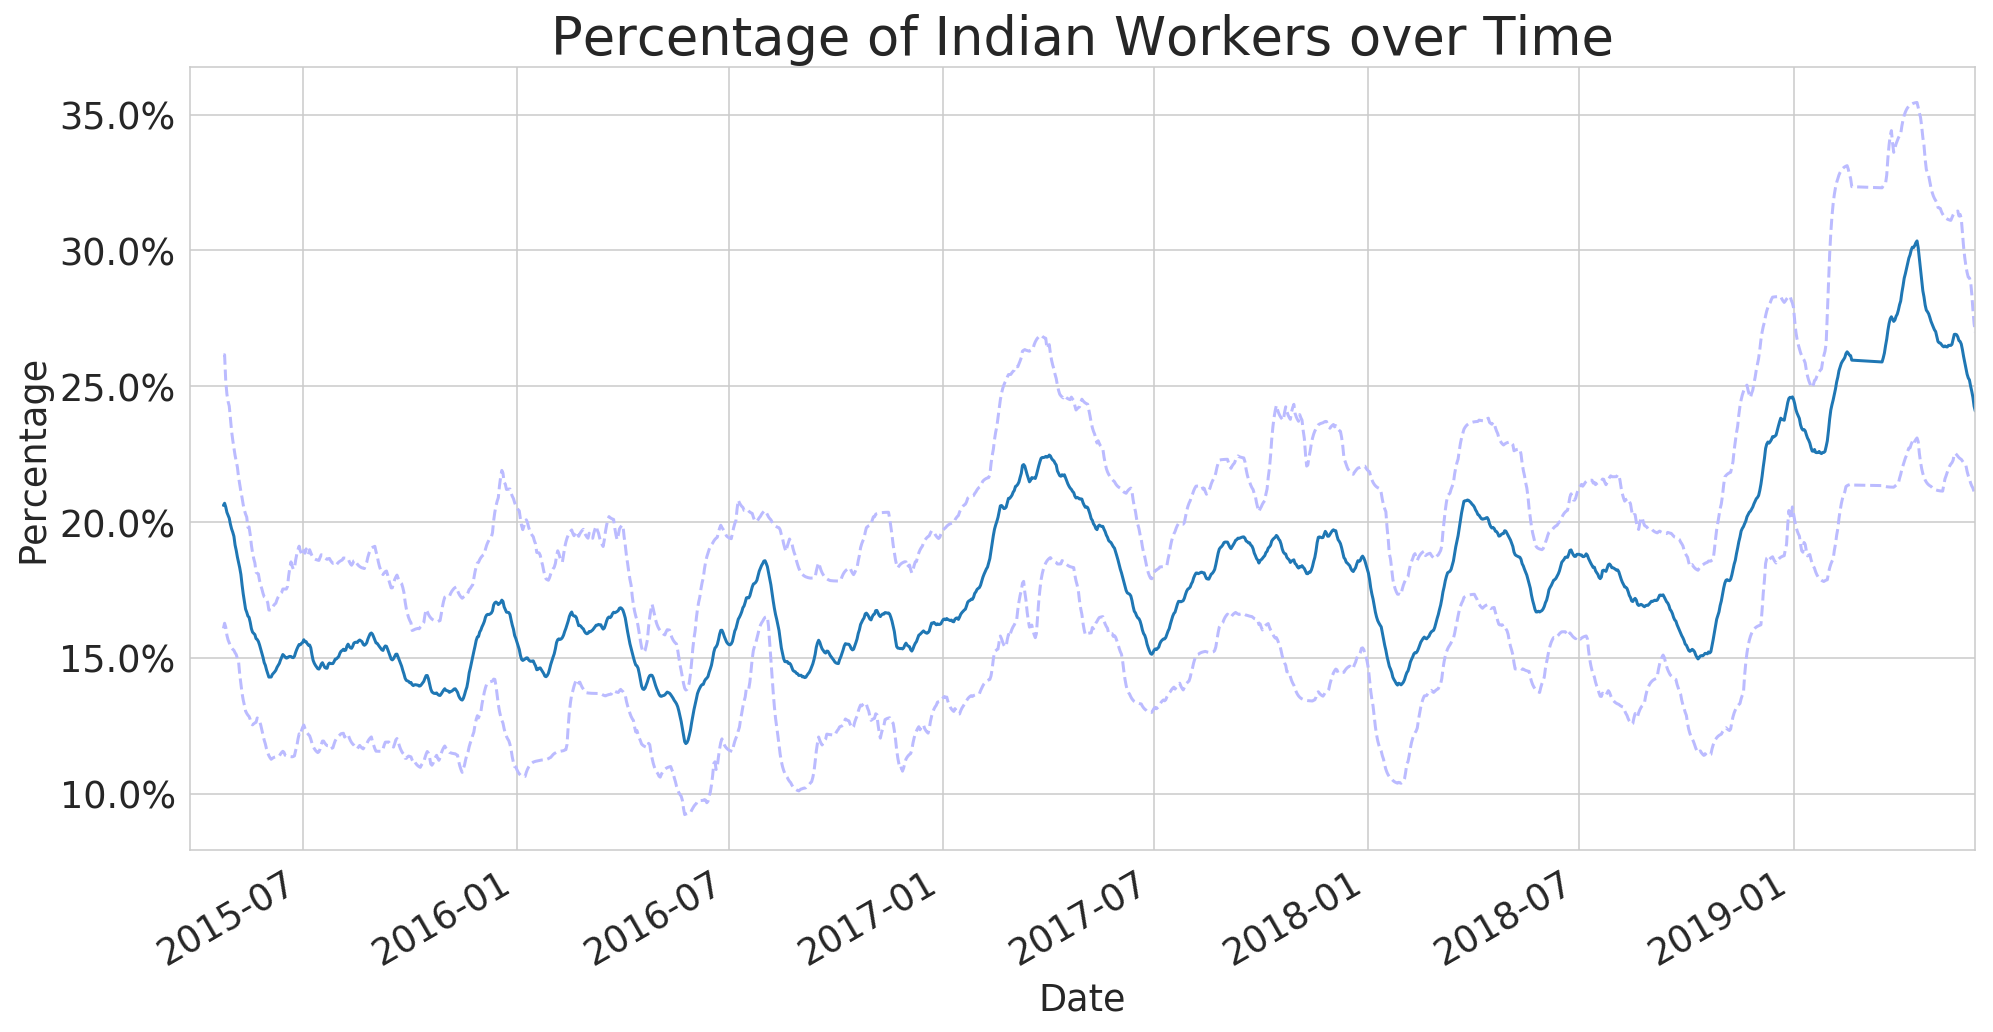

In [39]:
time_plot(100*country_table['IN'], 
          'Percentage of Indian Workers over Time', 
          'plots/country-india.pdf')

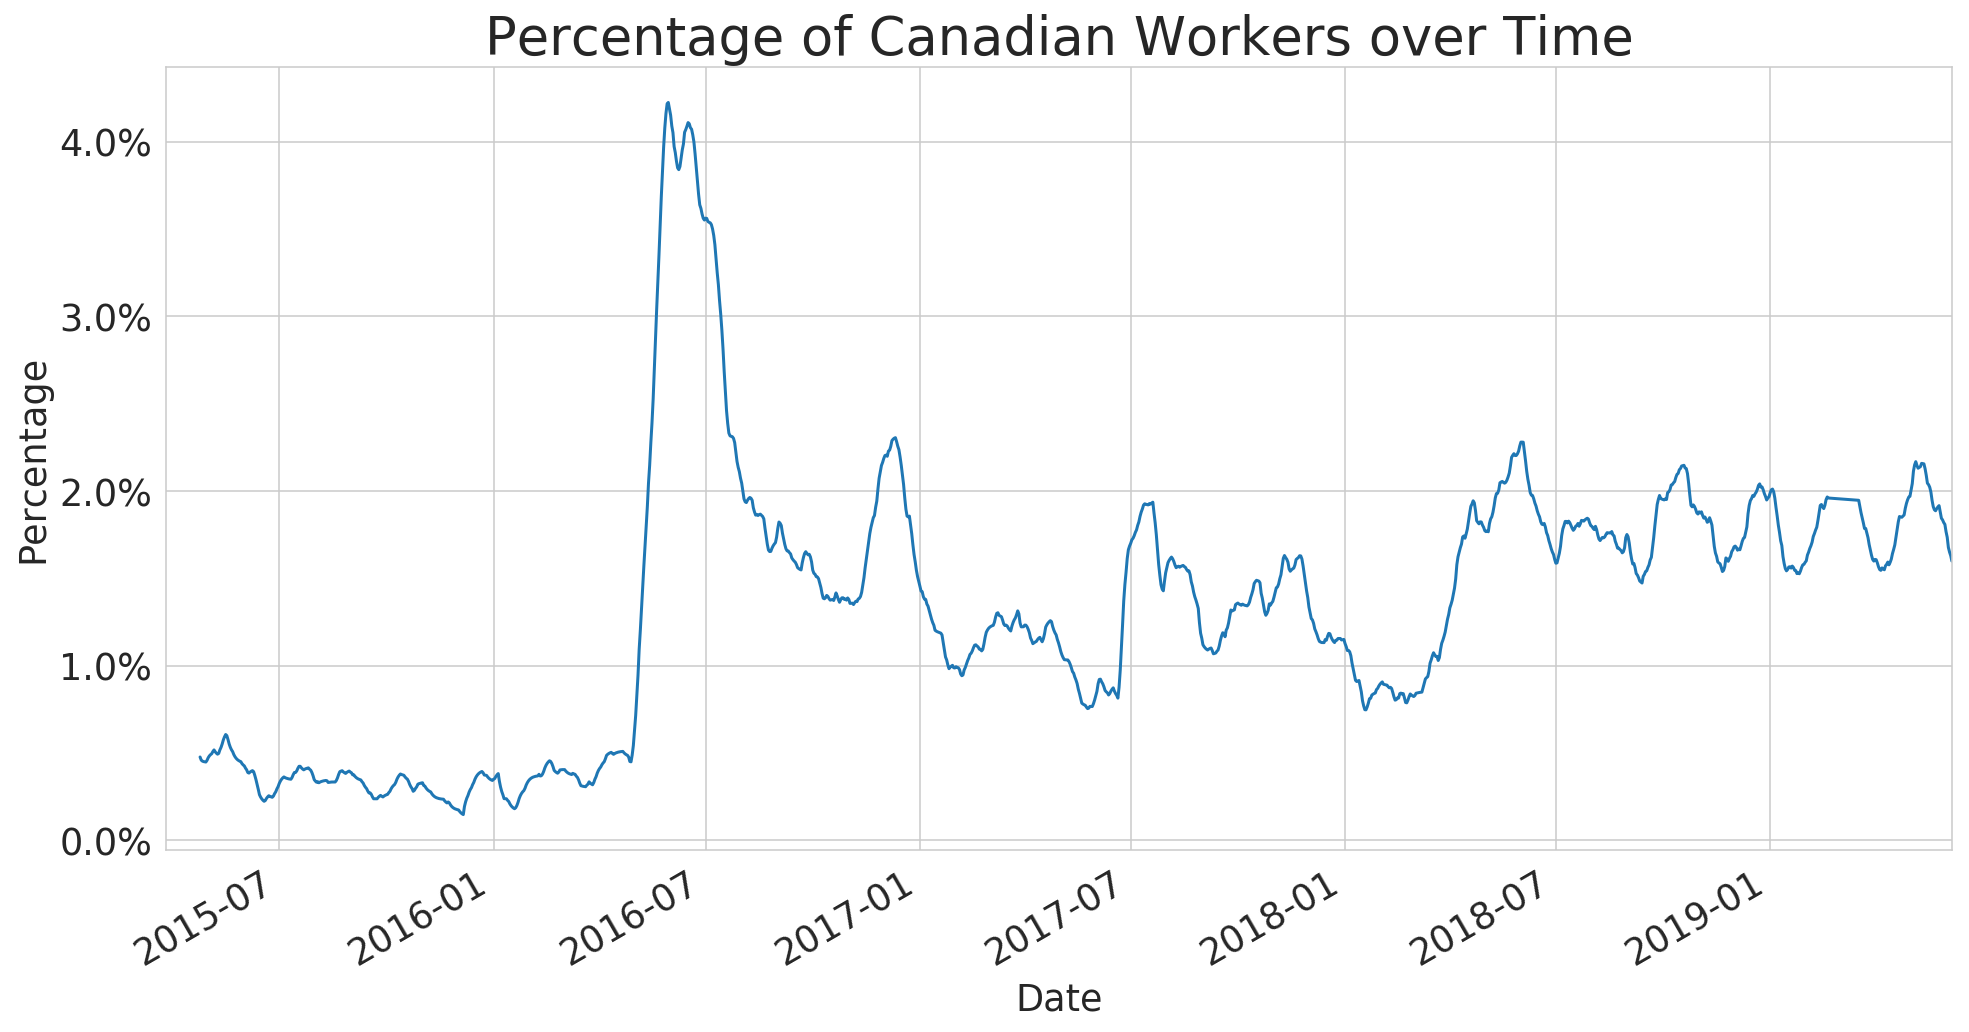

In [40]:
time_plot(data = 100*country_table['CA'], 
          title = 'Percentage of Canadian Workers over Time', 
          filename = 'plots/country-canada.pdf', 
          confidence=False)

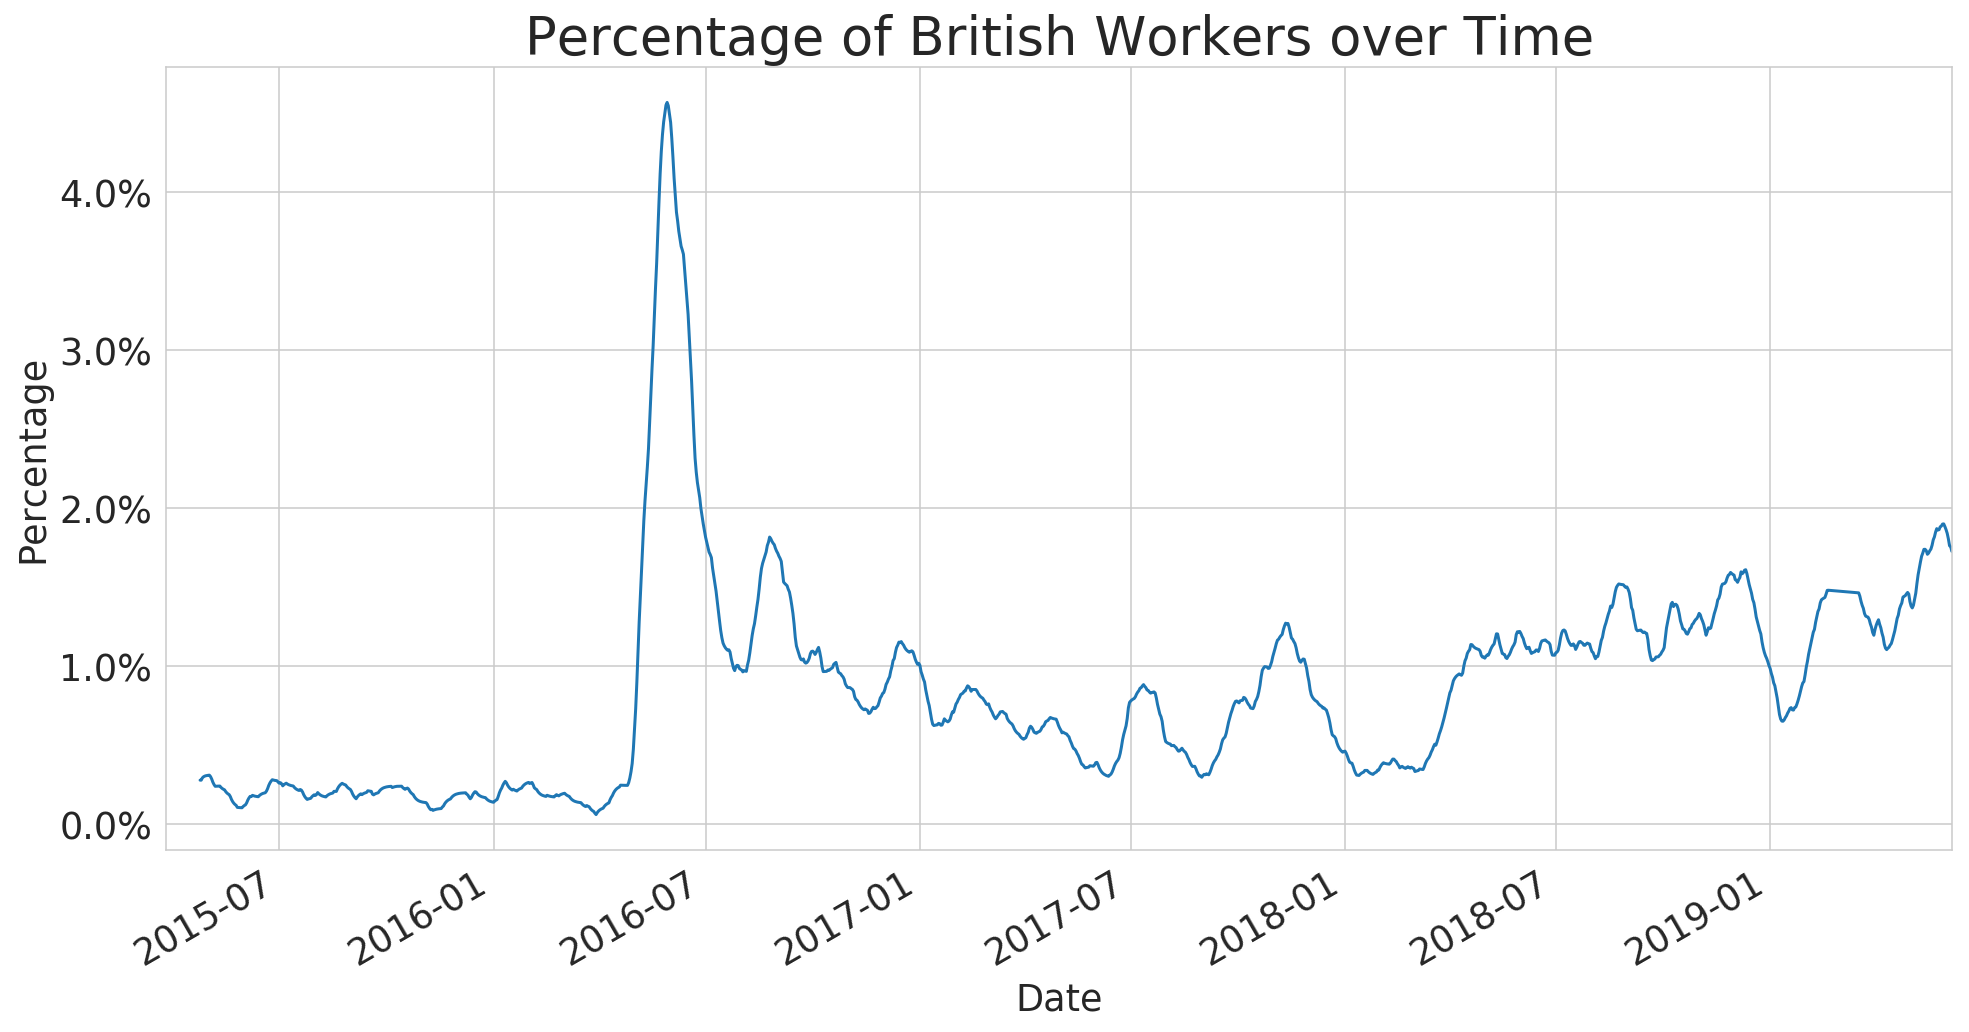

In [41]:
time_plot(data = 100*country_table['GB'], 
          title = 'Percentage of British Workers over Time', 
          filename = 'plots/country-uk.pdf', 
          confidence=False)

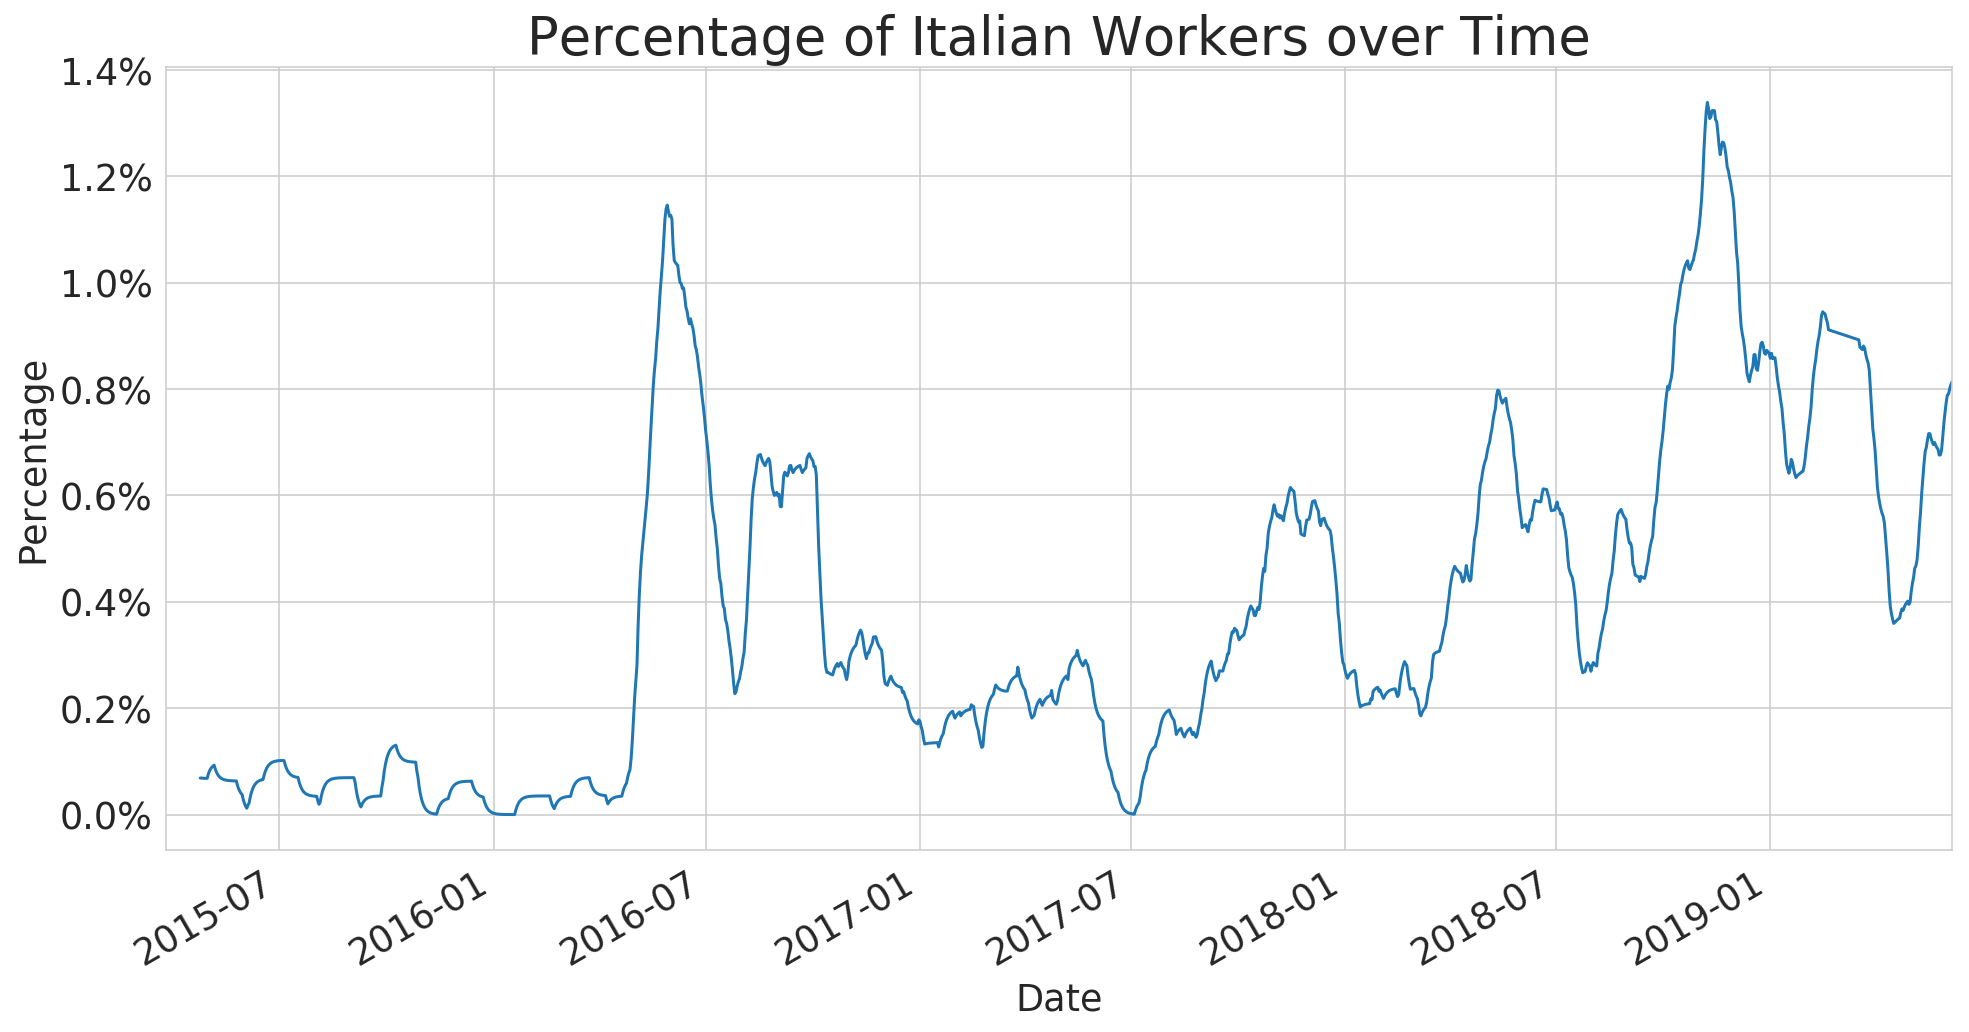

In [42]:
time_plot(100*country_table['IT'], 
          'Percentage of Italian Workers over Time', 
          'plots/country-italy.pdf',
          confidence=False)

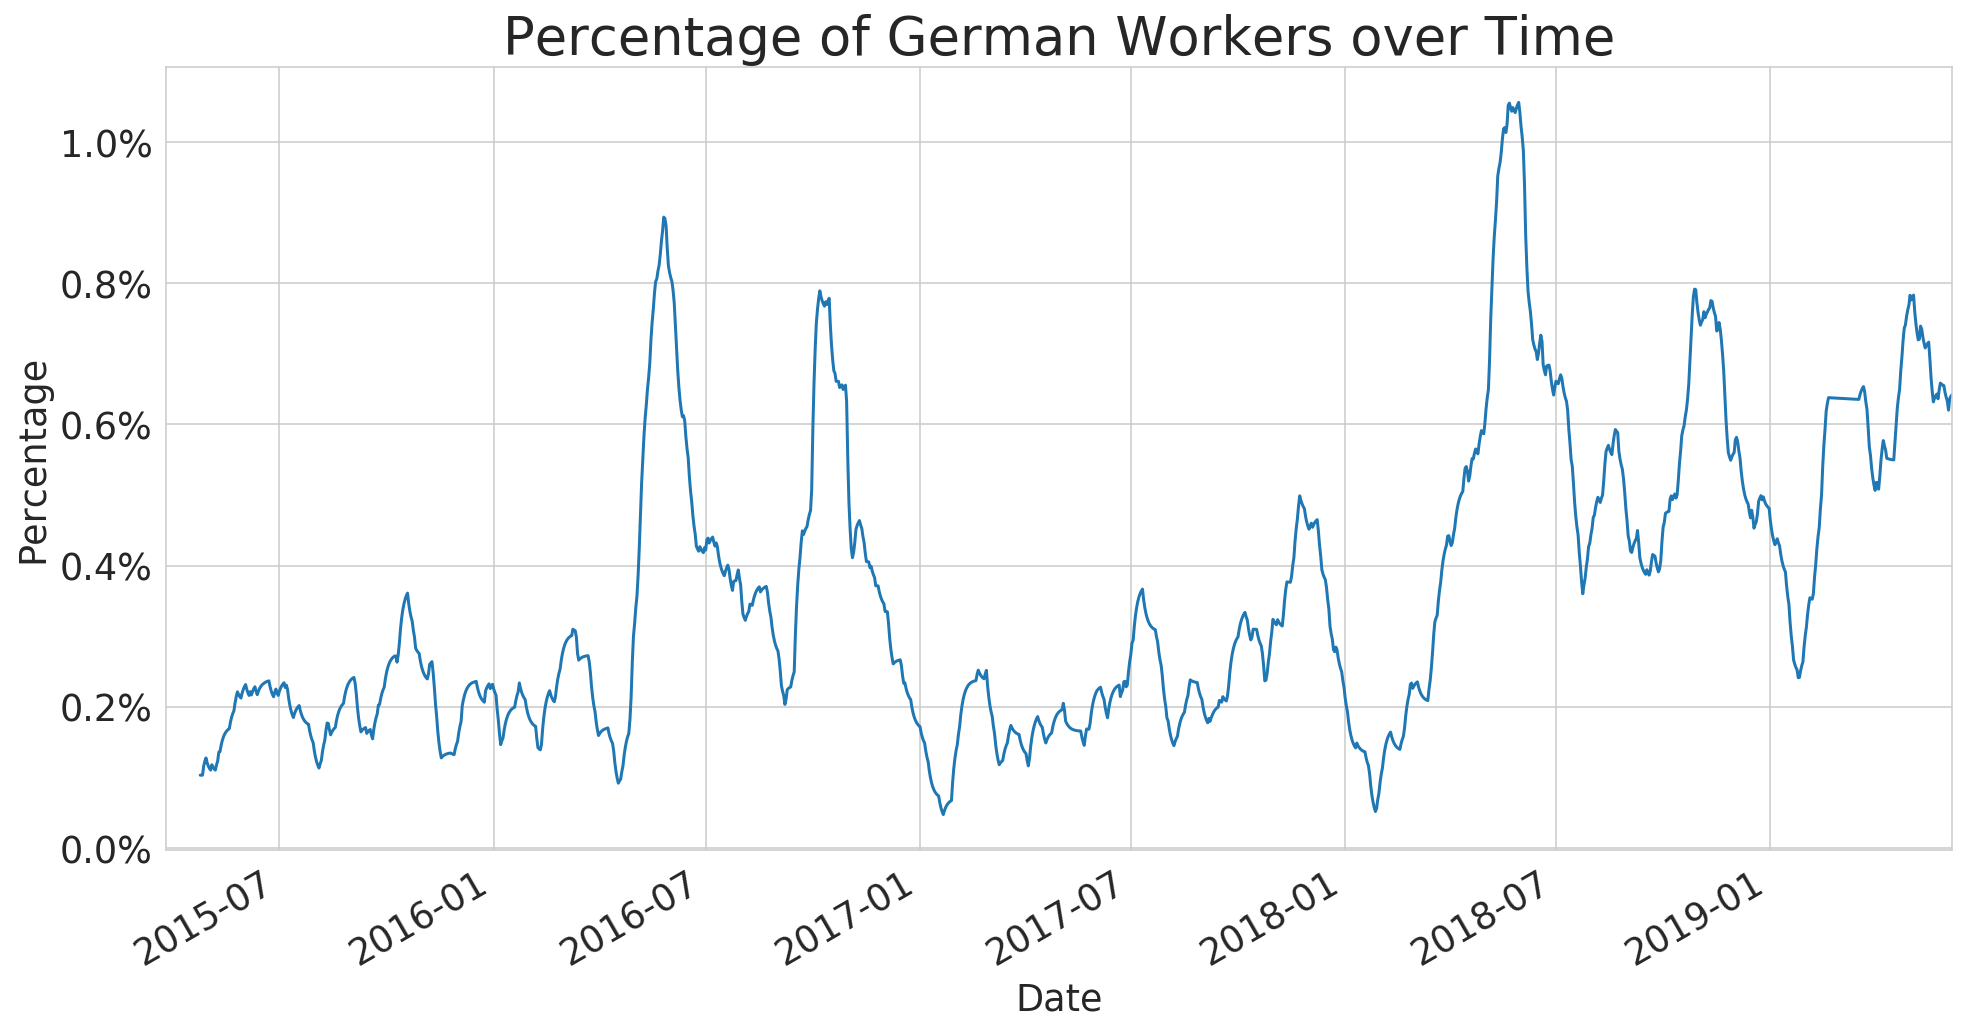

In [43]:
time_plot(100*country_table['DE'], 
          'Percentage of German Workers over Time', 
          'plots/country-germany.pdf',
          confidence=False)

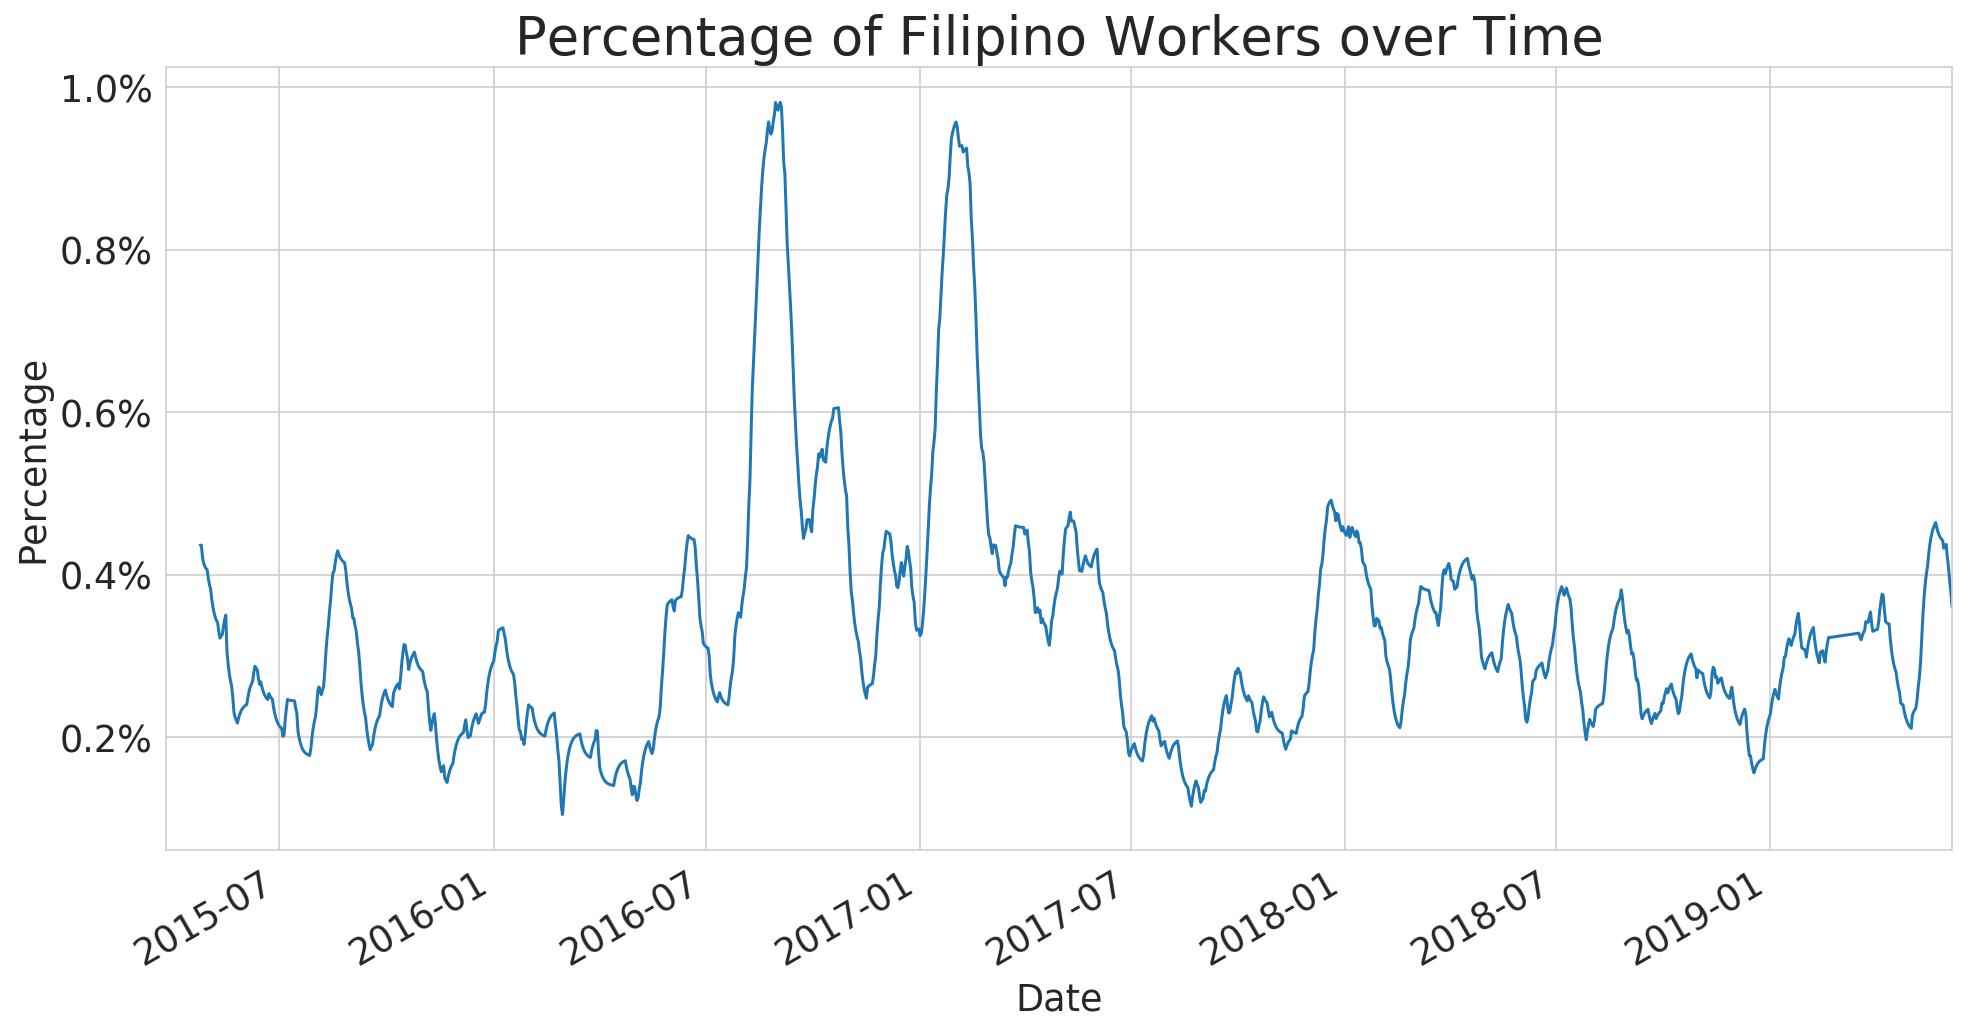

In [44]:
time_plot(100*country_table['PH'], 
          'Percentage of Filipino Workers over Time', 
          'plots/country-philipines.pdf',
          confidence=False)

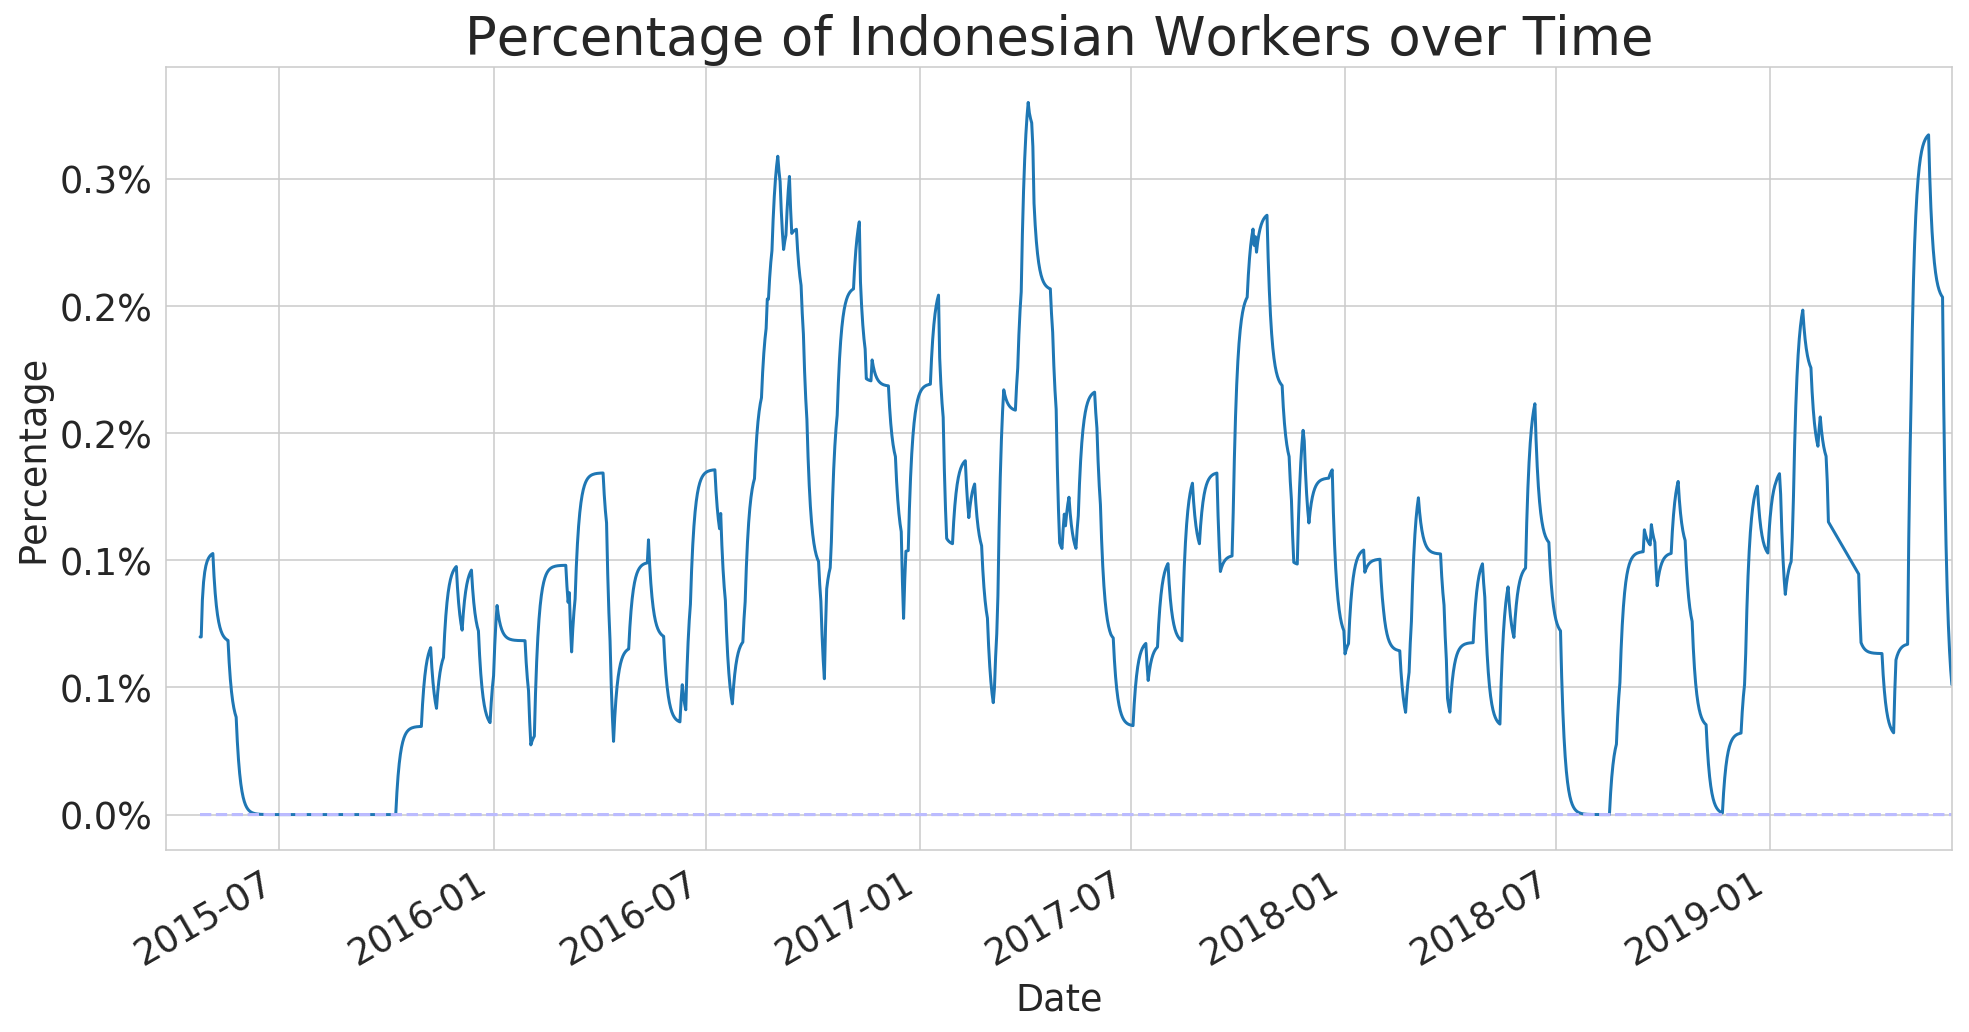

In [45]:
time_plot(100*country_table['ID'], 
          'Percentage of Indonesian Workers over Time', 
          'plots/country-indonesia.pdf')

## Gender

In [46]:
gender_table = pd.crosstab(index=df.date, columns=df.gender, 
                            values='worker_id', aggfunc=np.count_nonzero, normalize='index')

In [47]:
gender_table.mean()

gender
Female    0.000007
female    0.491157
male      0.508837
dtype: float64

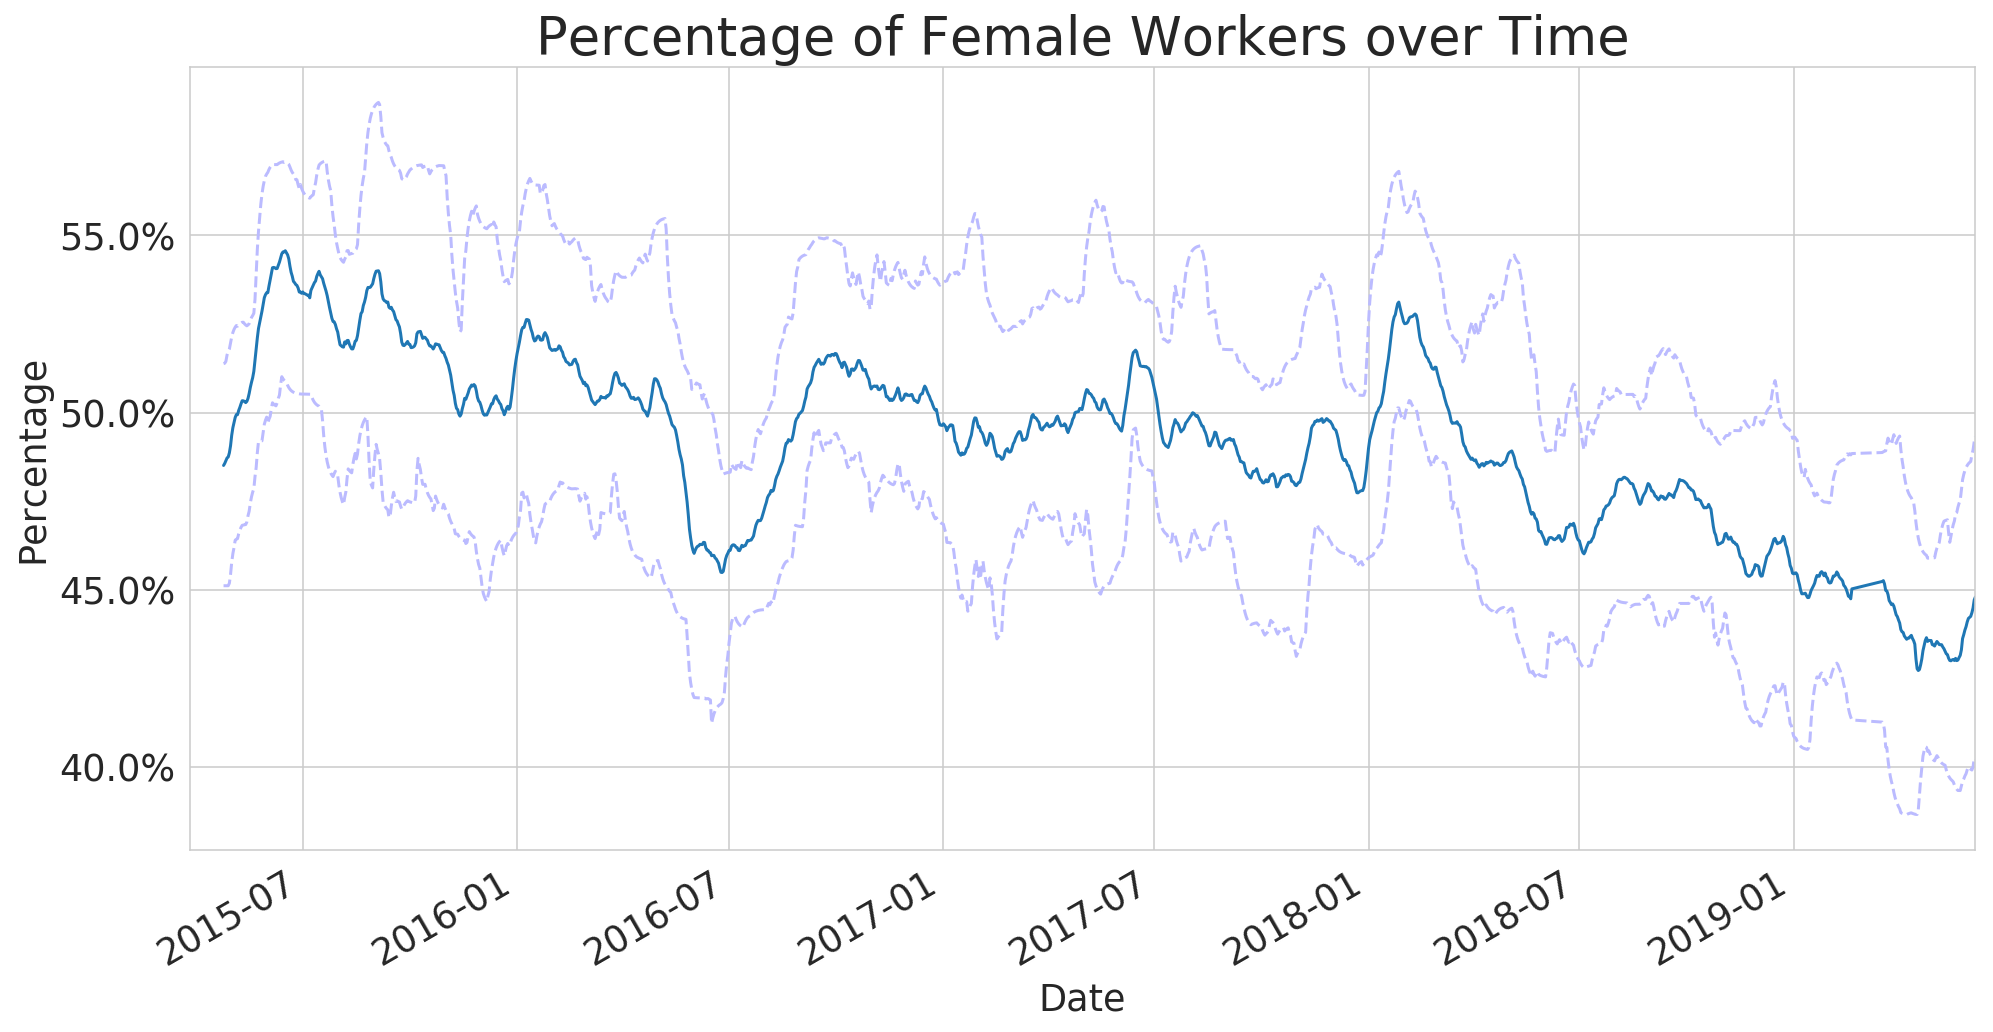

In [48]:
time_plot(data = 100*gender_table['female'], 
          title = 'Percentage of Female Workers over Time', 
          filename = 'plots/gender-female.pdf', 
          confidence=True)

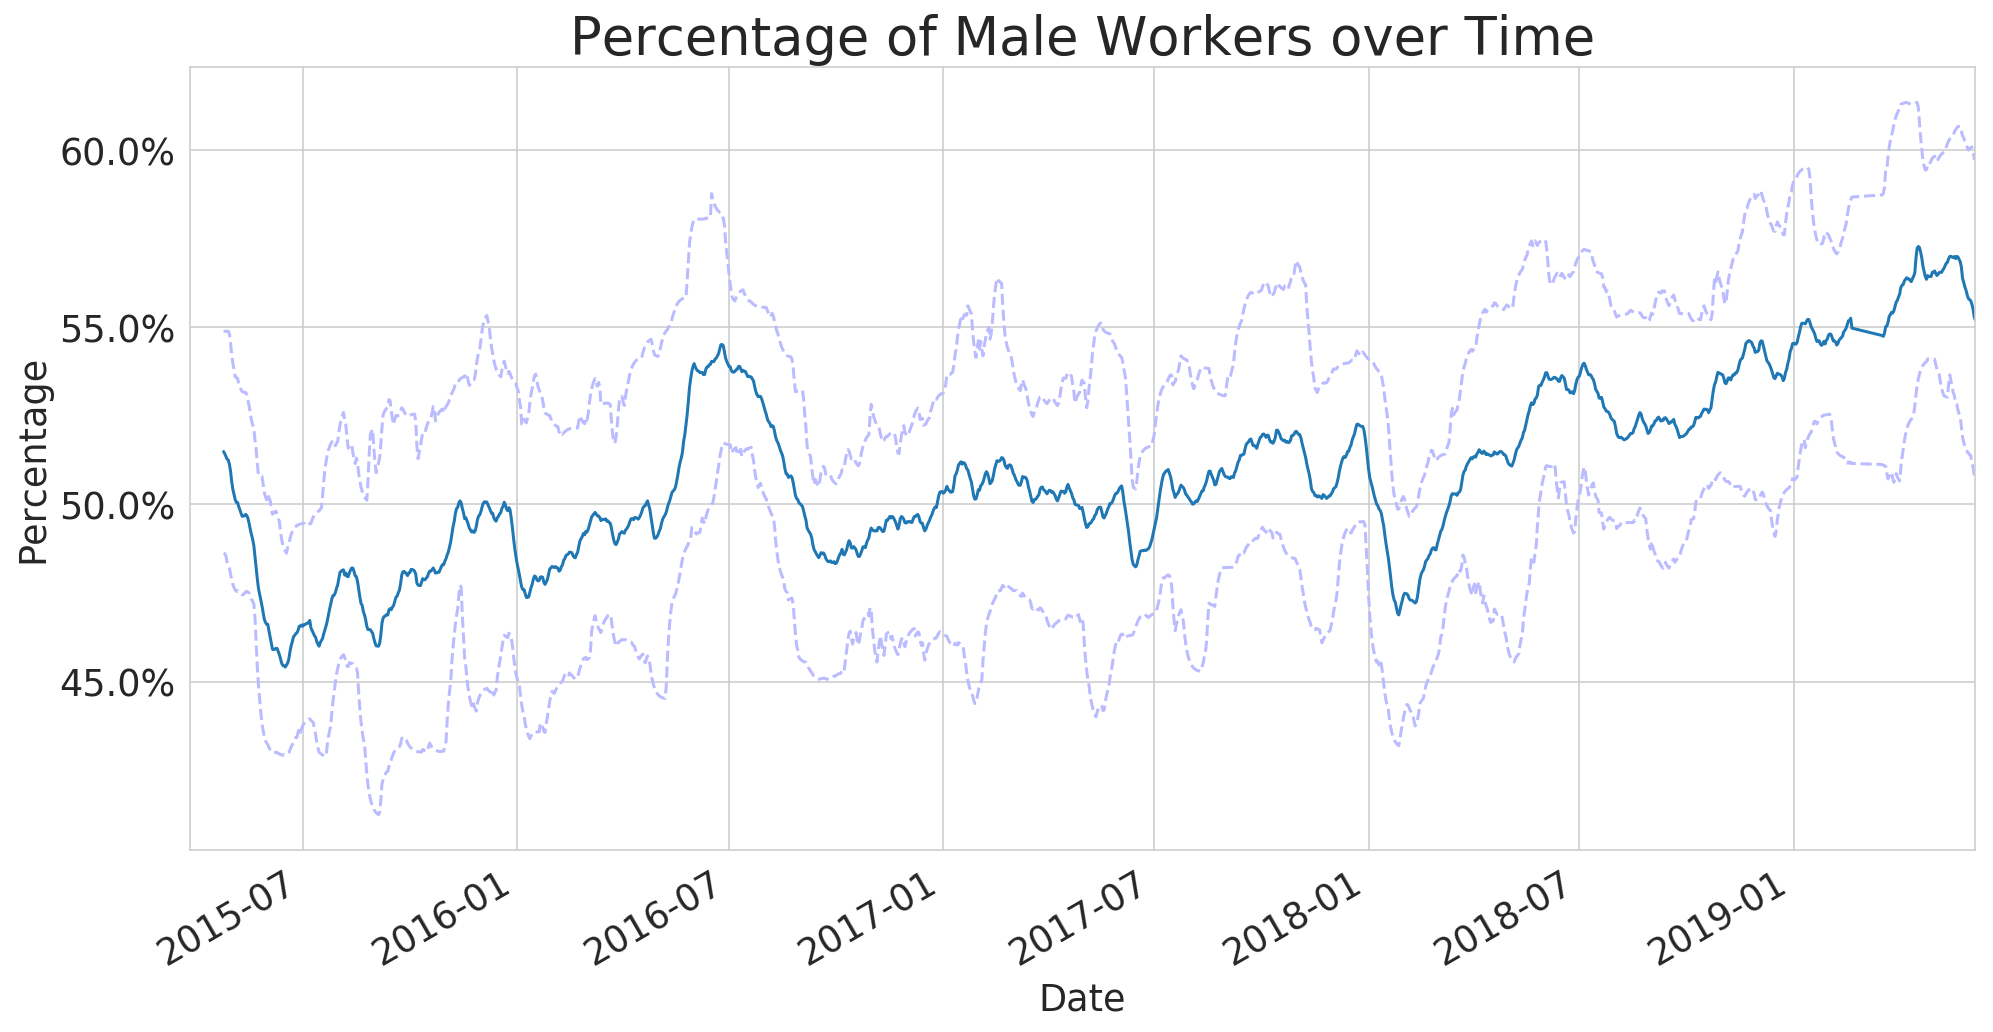

In [49]:
time_plot(data = 100*gender_table['male'], 
          title = 'Percentage of Male Workers over Time', 
          filename = 'plots/gender-male.pdf', 
          confidence=True)

### Gender by Country

In [50]:
gender_by_country = pd.pivot_table(data=df,
                             values='worker_id', 
                             aggfunc=np.count_nonzero,
                             index=df.location_country,
                             columns=df.gender)

In [51]:

# Keep only US and India
gender_by_country = gender_by_country[gender_by_country.index.isin(['US', 'IN', 'CA', 'GB', 'PH', 'DE', 'IT', 'FR'])]
# Normalize and keep percentages
gender_by_country_perc = gender_by_country.apply(lambda x: 100*x / float(x.sum()), axis=1).round(2)
gender_by_country_perc = gender_by_country_perc.reindex(['US', 'IN', 'CA', 'GB', 'IT', 'PH', 'DE', 'FR' ])

In [52]:
gender_by_country.sum()

gender
Female        1.0
female    70268.0
male      69955.0
dtype: float64

In [53]:
gender_by_country.sum()/gender_by_country.sum().sum()

gender
Female    0.000007
female    0.501113
male      0.498880
dtype: float64

In [54]:
gender_by_country

gender            Female   female     male
location_country                          
CA                   NaN    865.0   1083.0
DE                   NaN    150.0    382.0
FR                   NaN     96.0    282.0
GB                   NaN    449.0    807.0
IN                   NaN   9422.0  17127.0
IT                   NaN    201.0    350.0
PH                   NaN    204.0    278.0
US                   1.0  58881.0  49646.0

In [55]:
gender_by_country_perc_df = gender_by_country_perc[['female','male']]

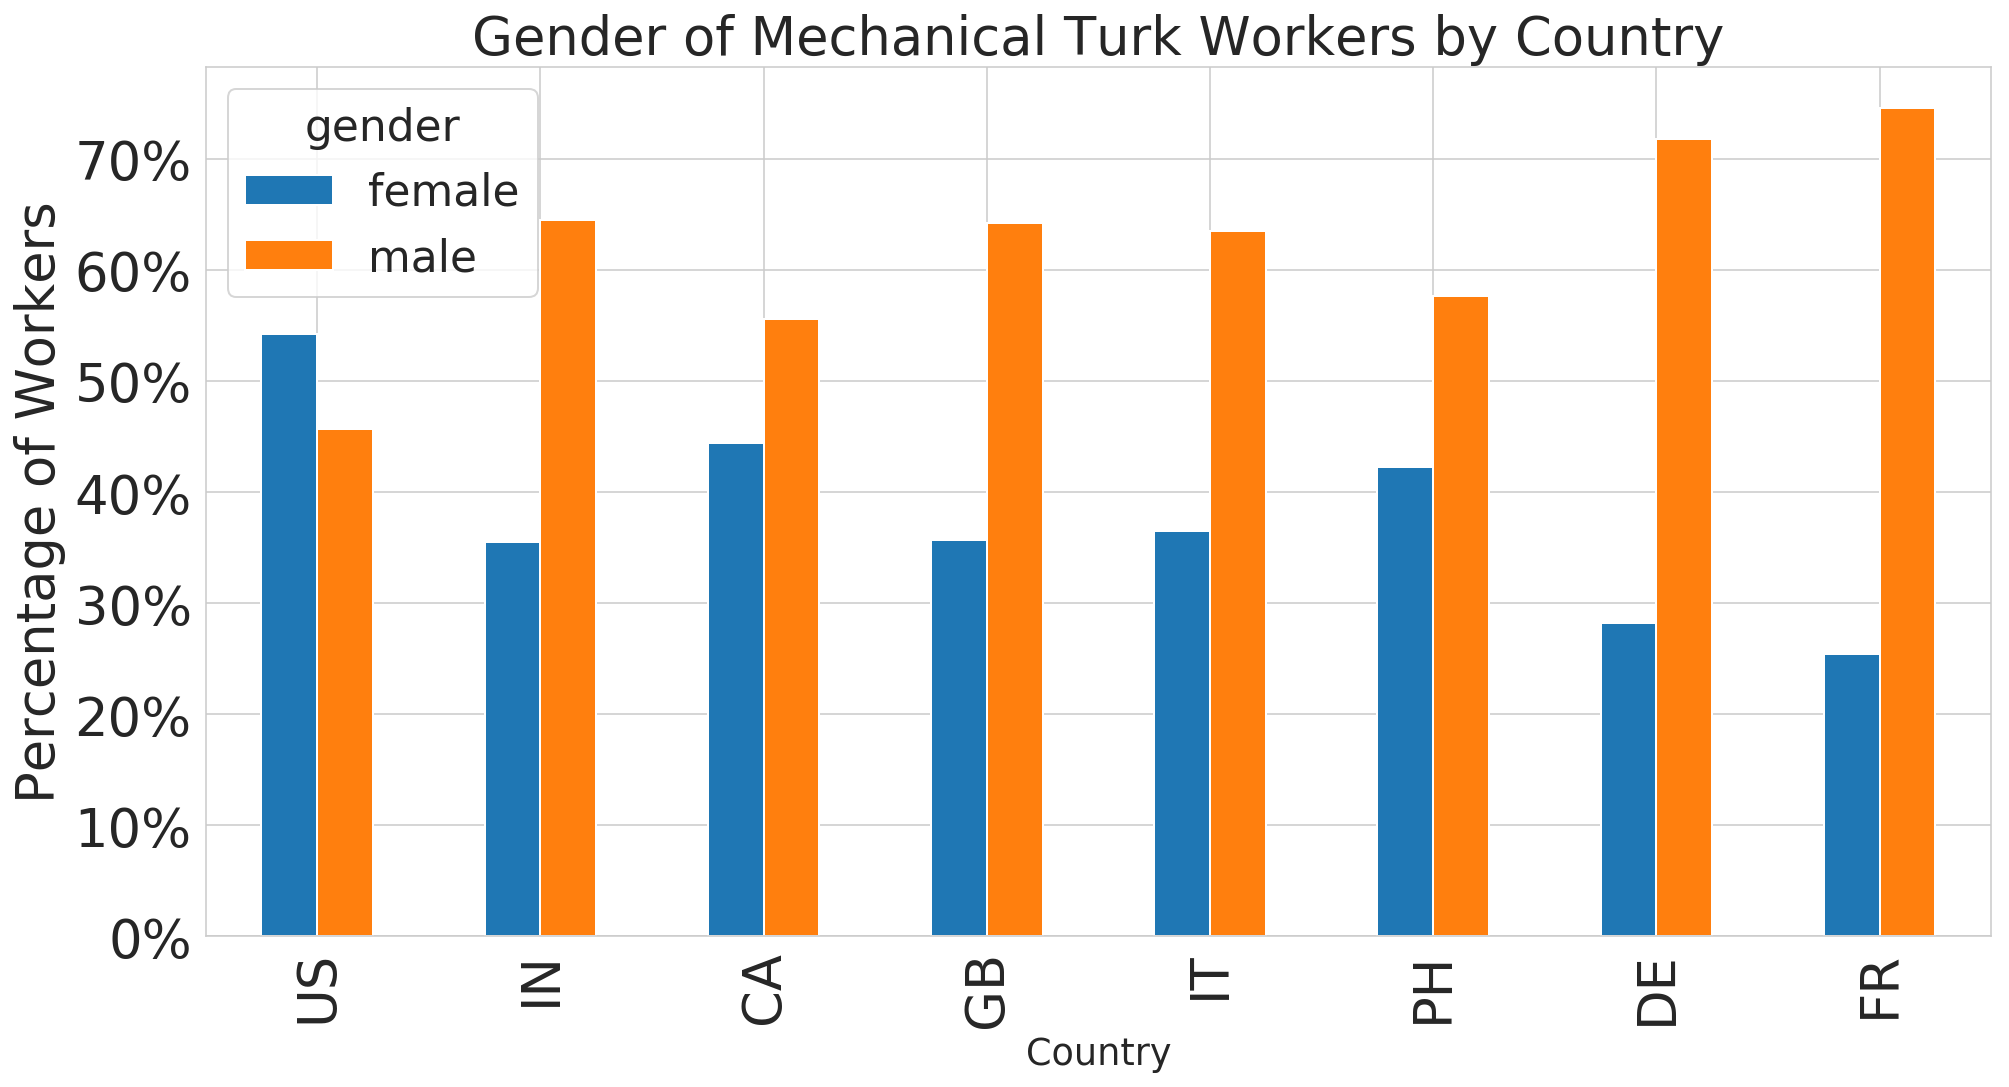

In [56]:
ax = gender_by_country_perc_df.plot.bar(fontsize='large')
ax.set_title("Gender of Mechanical Turk Workers by Country", fontsize='large')
ax.set_xlabel("Country", fontsize='small')
ax.set_ylabel("Percentage of Workers", fontsize='large')

fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)

fig = ax.get_figure()
fig.savefig('plots/gender.pdf', bbox_inches='tight')

### Gender by Country over Time

In [57]:
gender_table_us = pd.crosstab(index=df[df.location_country=='US'].date, columns=df[df.location_country=='US'].gender, 
                            values='worker_id', aggfunc=np.count_nonzero, normalize='index')

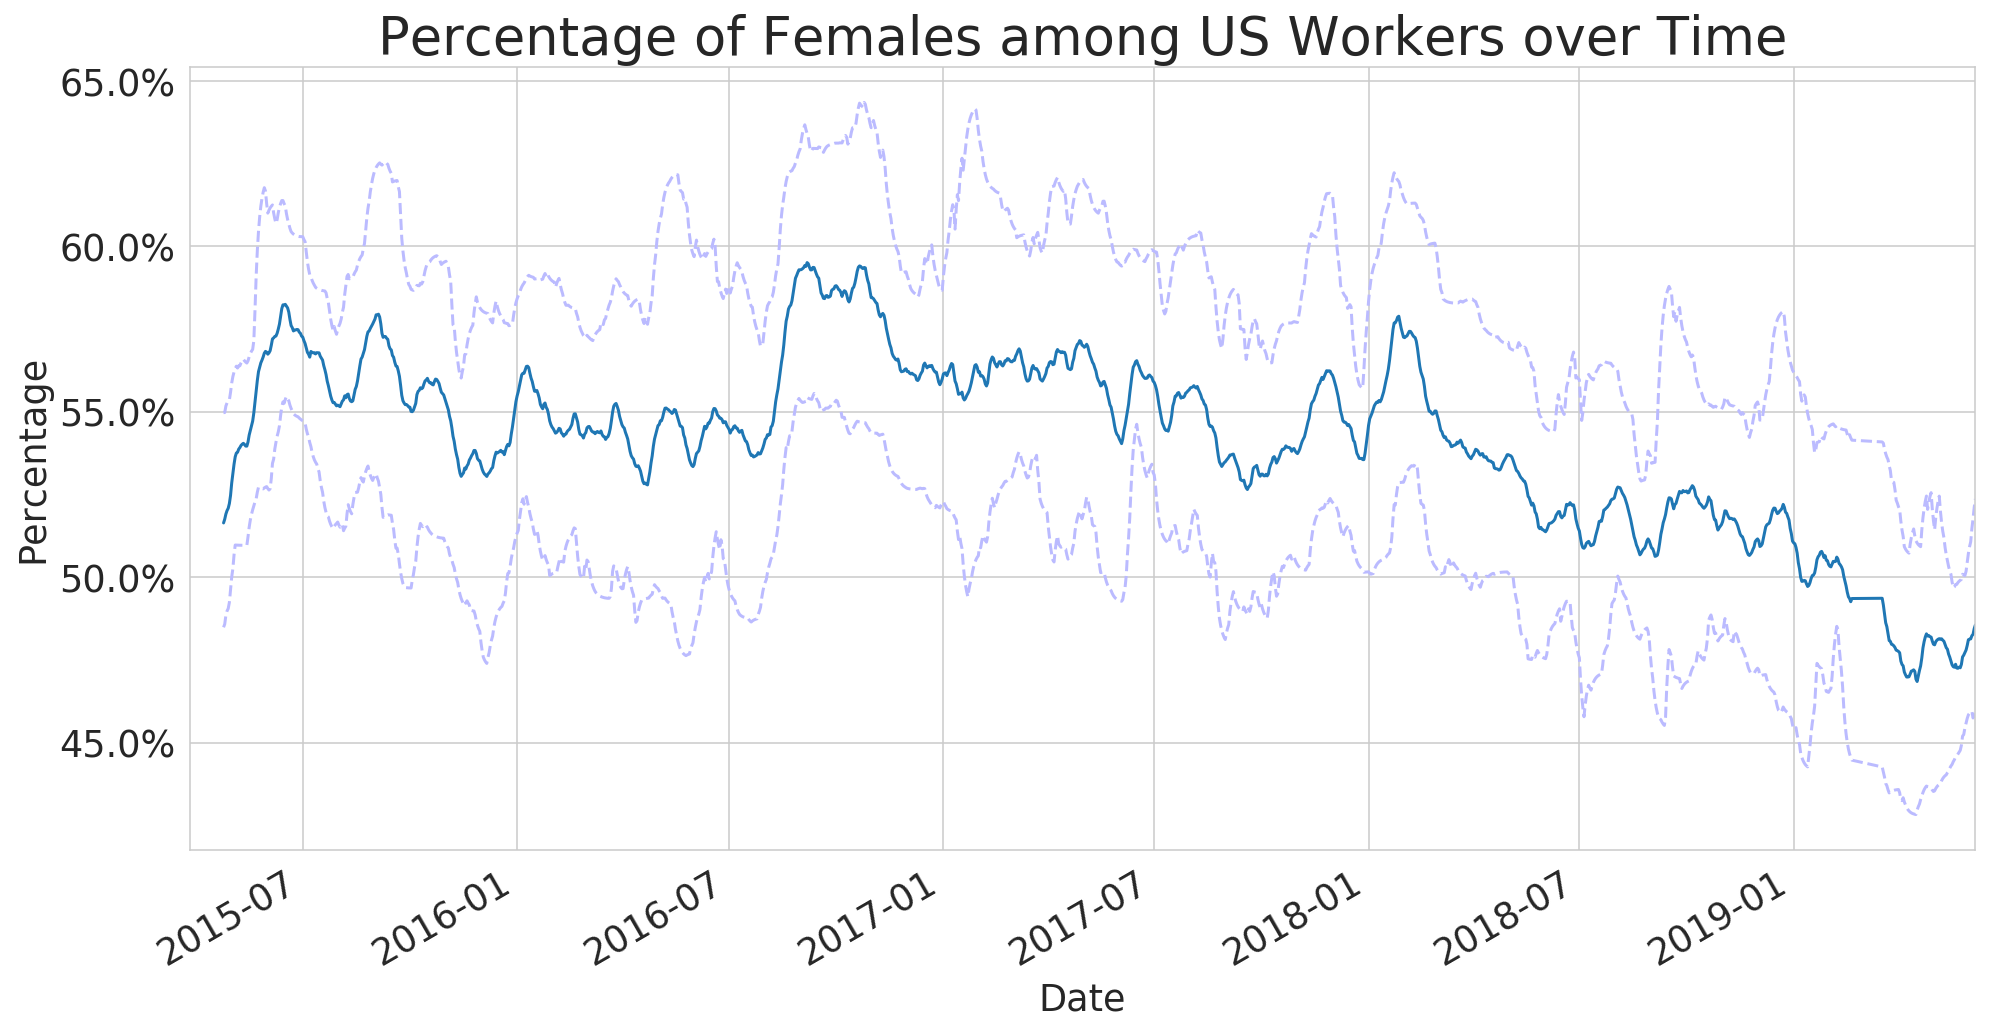

In [58]:
time_plot(data = 100*gender_table_us['female'], 
          title = 'Percentage of Females among US Workers over Time', 
          filename = 'plots/gender-female-usa.pdf', 
          confidence=True)

In [59]:
gender_table_in = pd.crosstab(index=df[df.location_country=='IN'].date, columns=df[df.location_country=='IN'].gender, 
                            values='worker_id', aggfunc=np.count_nonzero, normalize='index')

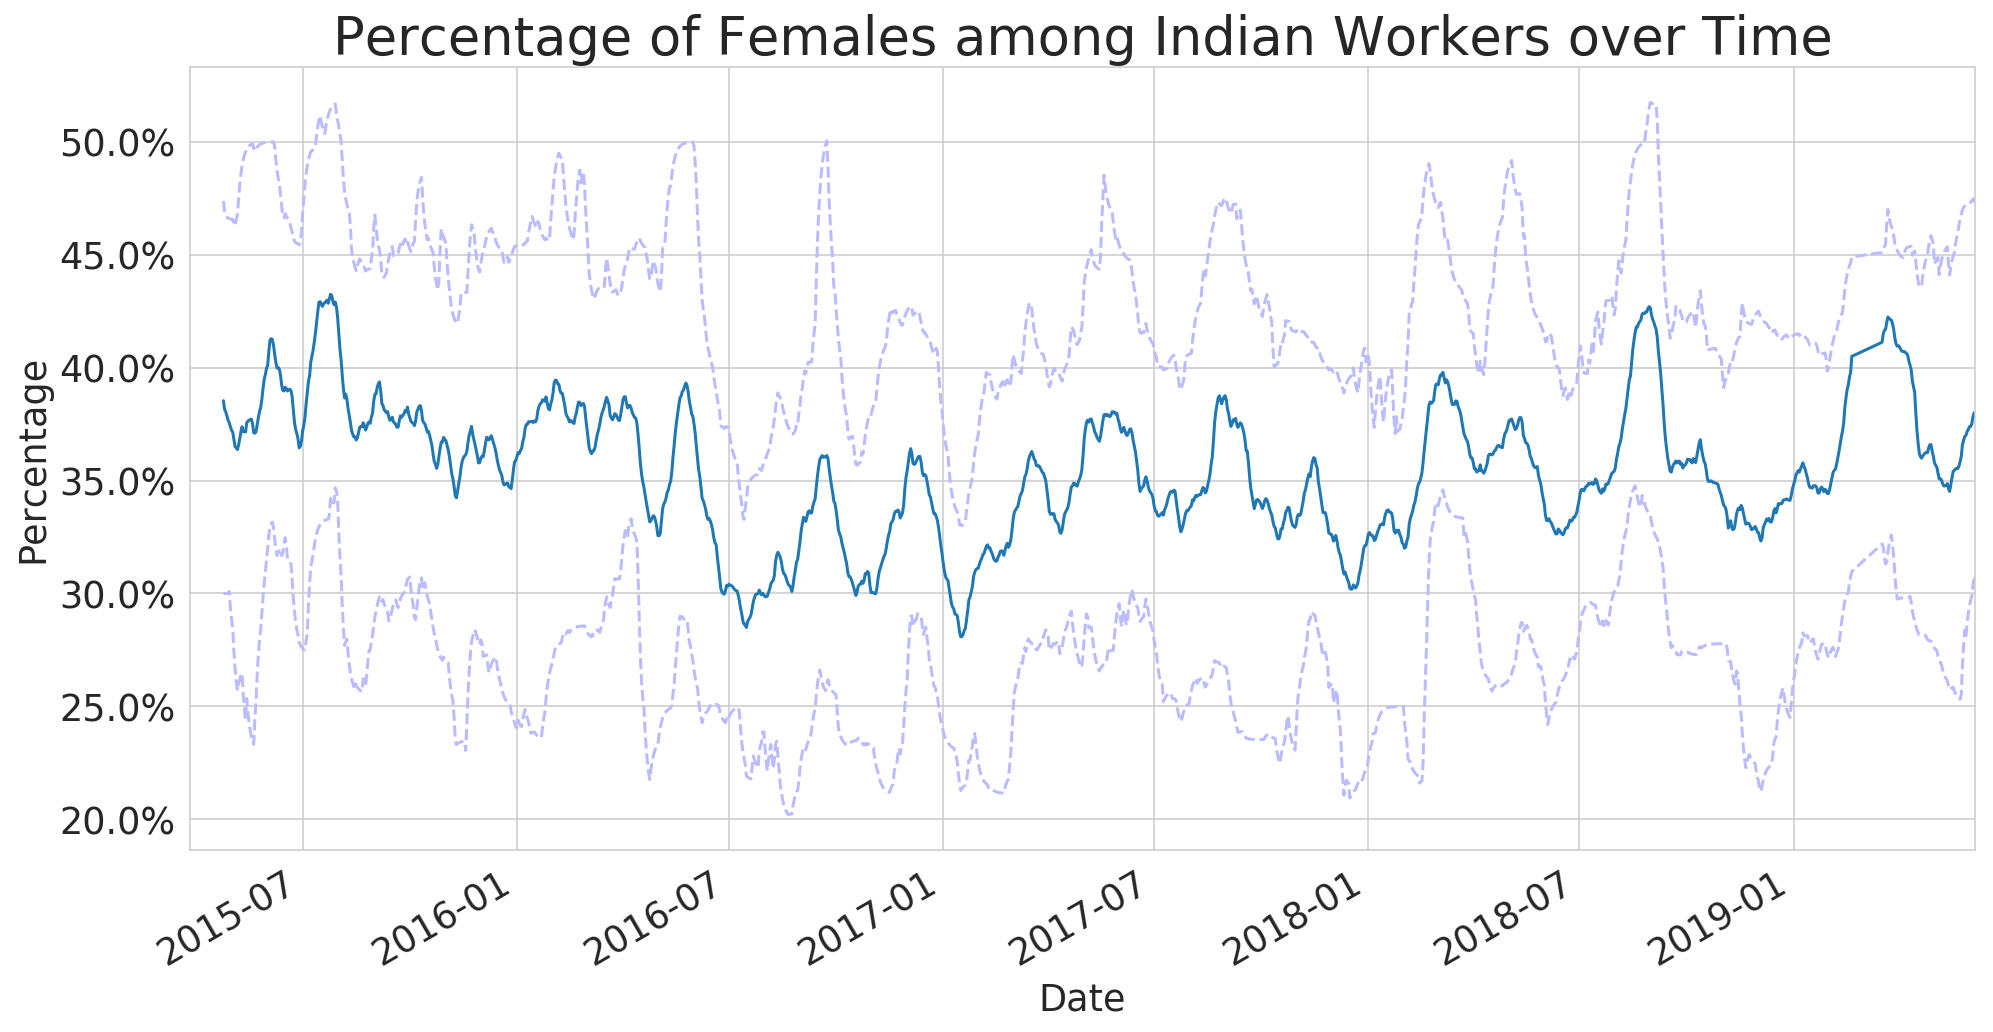

In [60]:
time_plot(data = 100*gender_table_in['female'], 
          title = 'Percentage of Females among Indian Workers over Time', 
          filename = 'plots/gender-female-india.pdf', 
          confidence=True)

### Year of Birth

In [61]:
yob_table = pd.crosstab(index=df.date, columns=df.year_of_birth, 
                            values='worker_id', aggfunc=np.count_nonzero, normalize='index')

In [66]:
# yob_table.head(5)

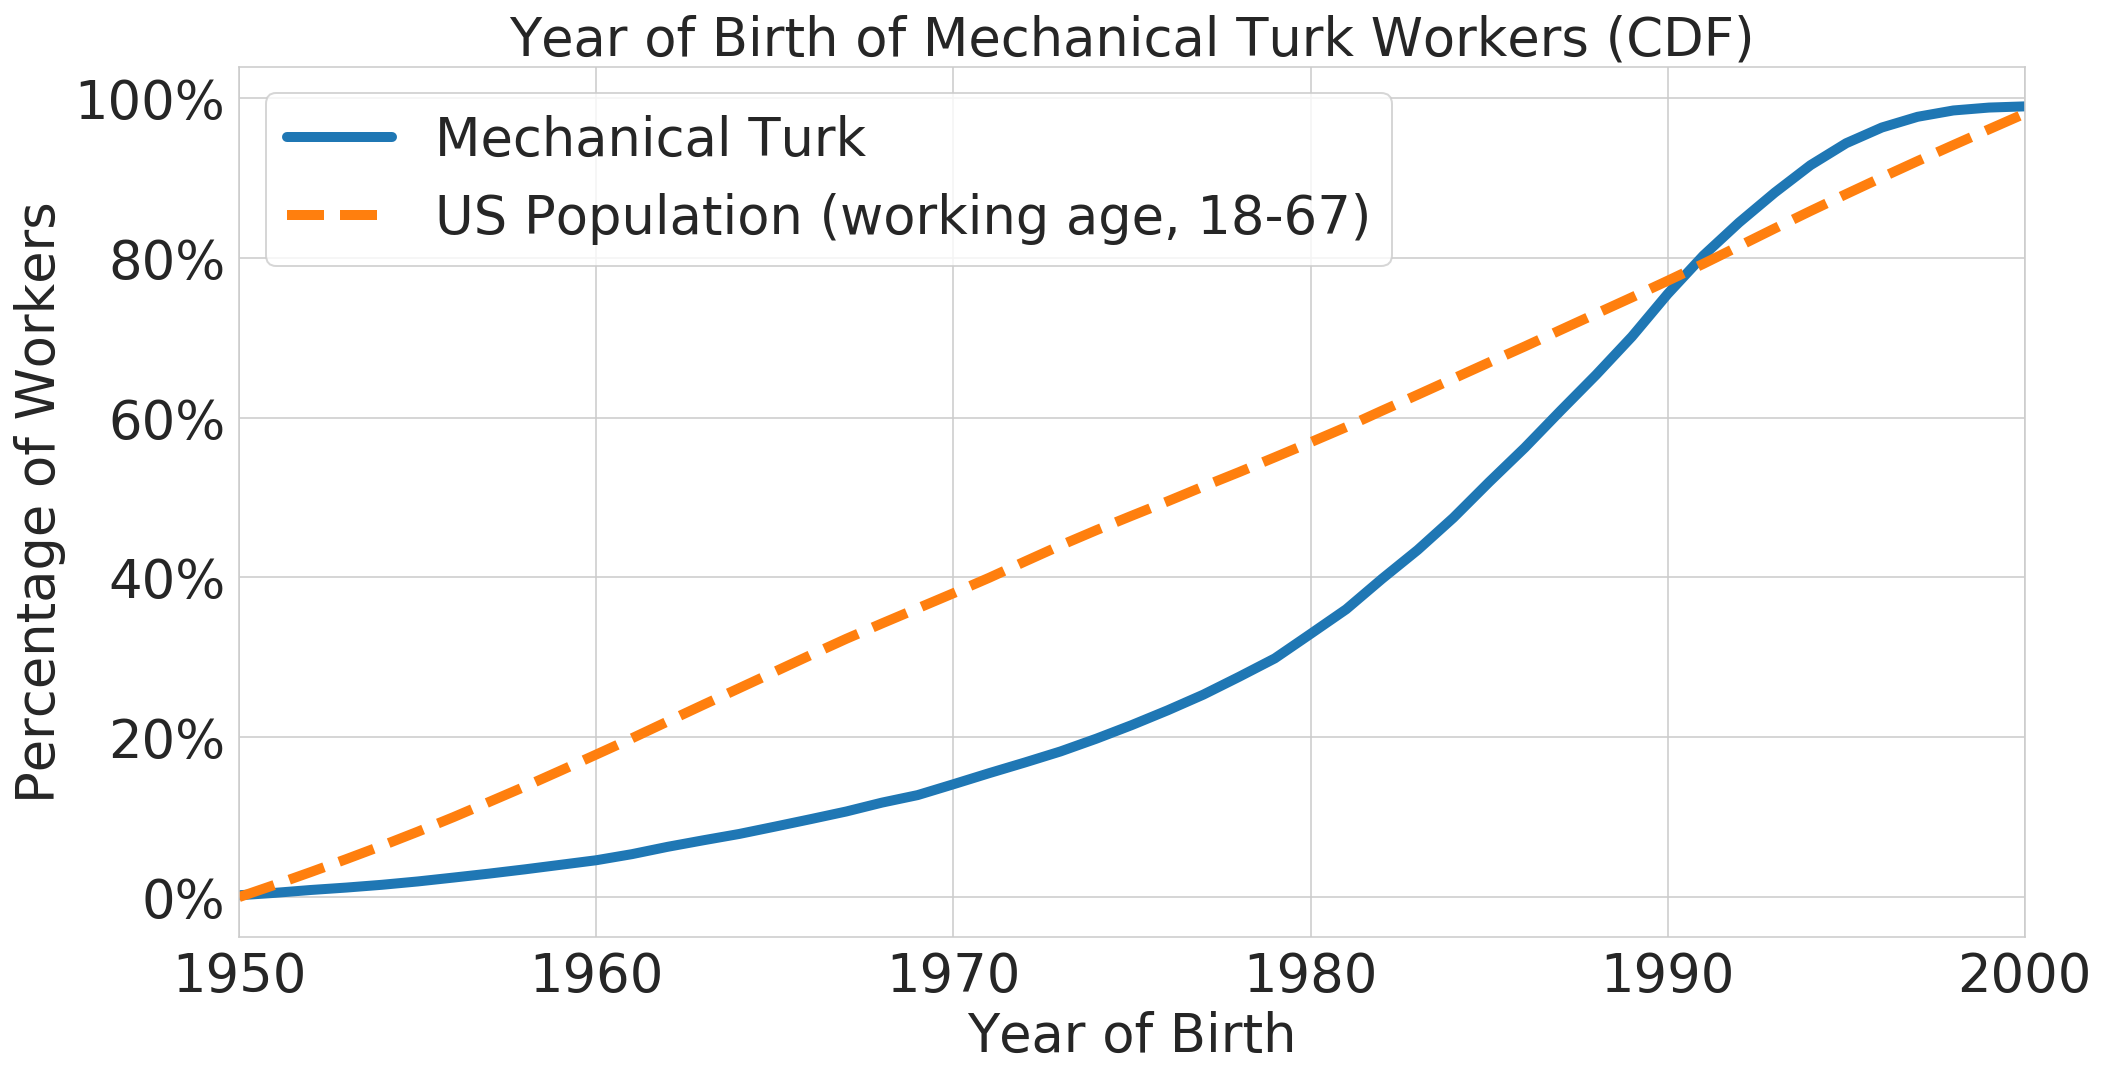

In [67]:
# Limit data to working age
years = [y for y in range(1950,2001)]

# 
yob_df = (100*yob_table[years].mean()).cumsum()
ax = yob_df.plot(fontsize='large', linewidth=5)
ax.set_title("Year of Birth of Mechanical Turk Workers (CDF)", fontsize='large')
ax.set_xlabel("Year of Birth", fontsize='large')
ax.set_ylabel("Percentage of Workers", fontsize='large')

fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)

census = pd.read_csv("census.csv", sep='\t', names  = ['Year of Birth', 'U', 'US Population'])
census.set_index('Year of Birth', inplace=True)
census.drop('U',axis=1, inplace=True)
census.sort_index(inplace=True)
census['US Population'] = 100*census['US Population']
census.plot(ax=ax, linestyle='--', linewidth=5)

ax.legend(['Mechanical Turk', 'US Population (working age, 18-67)'], fontsize='large')

fig = ax.get_figure()
fig.savefig('plots/yearofbirth.pdf', bbox_inches='tight')

In [68]:

census.dtypes

US Population    float64
dtype: object

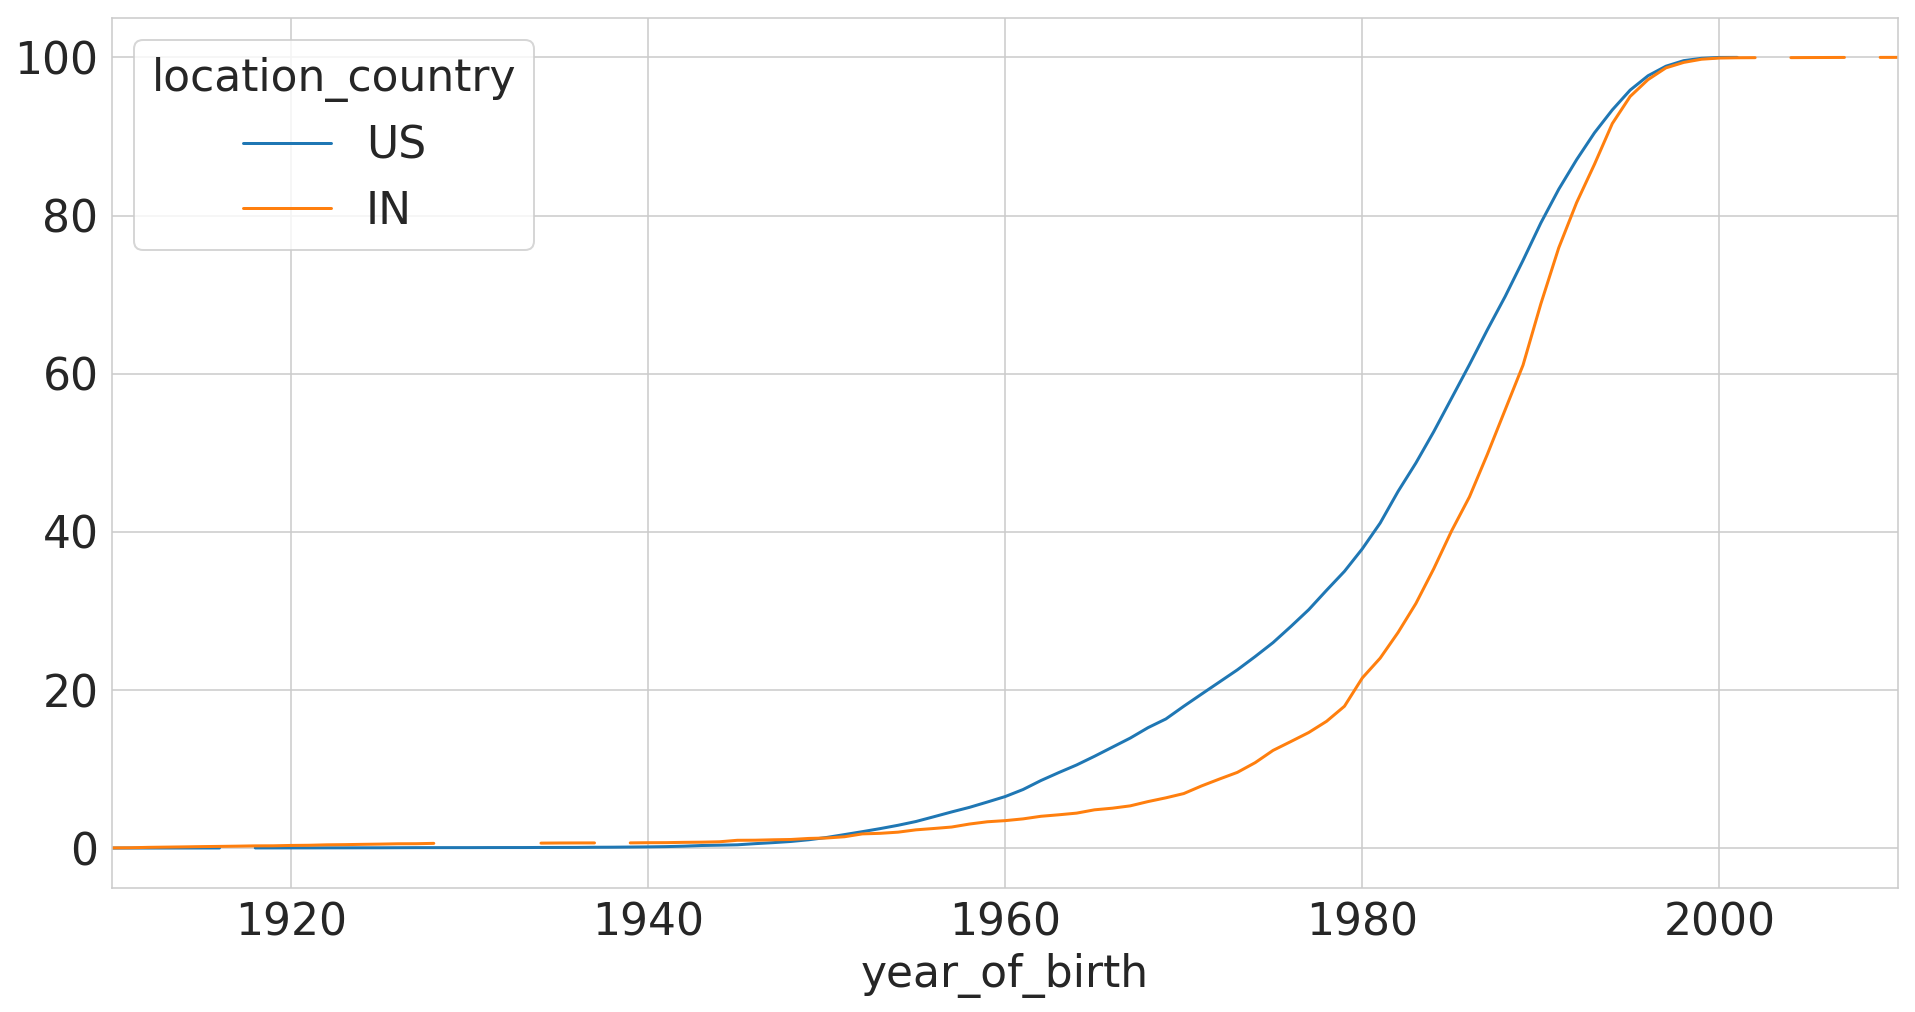

In [69]:
age_by_country = pd.pivot_table(data=df,
                             values='worker_id', 
                             aggfunc=np.count_nonzero,
                             index=df.year_of_birth,
                             columns=df.location_country)

age_by_country = age_by_country[['US', 'IN']]
age_by_country = 100*age_by_country / age_by_country.sum()
# age_by_country.plot(ax = ax)
# fig
age_by_country.cumsum().plot()

In [70]:
# Keep only US and India

# Normalize and keep percentages
age_by_country_perc = age_by_country.apply(lambda x: 100*x / float(x.sum()), axis=1).round(2)
# age_by_country_perc = age_by_country_perc.reindex(['US', 'IN', 'CA', 'GB', 'PH', 'DE'])

In [71]:
age_by_country_perc

location_country      US      IN
year_of_birth                   
1910               12.26   87.74
1911               15.50   84.50
1912                1.72   98.28
1913                5.76   94.24
1914                5.76   94.24
1915                5.16   94.84
1916                3.38   96.62
1917                 NaN  100.00
1918               16.37   83.63
1919               19.65   80.35
1920                3.92   96.08
1921                3.92   96.08
1922                8.91   91.09
1923                7.54   92.46
1924               10.90   89.10
1925                5.76   94.24
1926               16.68   83.32
1927               52.40   47.60
1928                3.92   96.08
1929              100.00     NaN
1930              100.00     NaN
1931              100.00     NaN
1932               42.33   57.67
1933              100.00     NaN
1934               25.90   74.10
1935               19.65   80.35
1936               32.85   67.15
1937               83.71   16.29
1938              100.00     NaN
1939               83.71   16.29
...                  ...     ...
1981               56.52   43.48
1982               55.22   44.78
1983               49.52   50.48
1984               47.41   52.59
1985               46.92   53.08
1986               49.66   50.34
1987               45.05   54.95
1988               42.78   57.22
1989               44.70   55.30
1990               37.91   62.09
1991               37.57   62.43
1992               39.54   60.46
1993               41.21   58.79
1994               36.00   64.00
1995               42.25   57.75
1996               45.97   54.03
1997               44.80   55.20
1998               50.52   49.48
1999               42.40   57.60
2000               41.50   58.50
2001               17.86   82.14
2002                 NaN  100.00
2003              100.00     NaN
2004                 NaN  100.00
2005                 NaN  100.00
2006               10.90   89.10
2007                 NaN  100.00
2008              100.00     NaN
2009                 NaN  100.00
2010                 NaN  100.00

[101 rows x 2 columns]

##### Decade of birth

In [ ]:
df['yob_decade'] = df['year_of_birth'].apply(lambda x: str(int(round(x,-1)))+'-'+str(int(round(x,-1))+9))
decades = ['1950-1959', '1960-1969', '1970-1979', '1980-1989', '1990-1999','2000-2009']
yob_table = pd.crosstab(index=df.date, columns=df.yob_decade, 
                            values='worker_id', aggfunc=np.count_nonzero, normalize='index')

In [ ]:
time_plot(100*yob_table[decades], "Year of Birth of Workers", 
          filename = 'plots/decateofbirth.pdf', confidence = False, legend = True)

#### Indian workers are *slightly* younger

In [ ]:
data = pd.DataFrame(df[df.location_country=='IN'])
yob_table_in = pd.crosstab(index=data.date, columns=data.yob_decade, 
                            values='worker_id', aggfunc=np.count_nonzero, normalize='index')

In [ ]:
time_plot(100*yob_table_in[decades], "Year of Birth of Indian Workers", 
          'plots/yearofbirth-indian.pdf', confidence = False, legend = True)

### Marital Status

In [ ]:
marital_status = pd.pivot_table(data=df,
                             values='worker_id', 
                             aggfunc=np.count_nonzero,
                             index=df.marital_status)

In [ ]:
status = set(df.marital_status)
status.discard('None')
status.discard('separated')
status.discard('widowed')
status = sorted(status)
status

In [ ]:
marital_status = 100* marital_status / marital_status.sum()
marital_status = marital_status.T[status].T

In [ ]:
marital_status

In [ ]:
ax = marital_status.plot.bar(fontsize='large')
ax.set_title("Marital Status of Workers", fontsize='large')
ax.set_xlabel("Marital Status", fontsize='small')
ax.set_ylabel("Percentage of Workers", fontsize='large')
ax.legend([''])

fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)

fig = ax.get_figure()
fig.savefig('plots/marital-status.pdf', bbox_inches='tight')

In [ ]:
married_table = pd.crosstab(index=df.date, columns=df.marital_status, 
                            values='worker_id', aggfunc=np.count_nonzero, normalize='index')

In [ ]:
status = set(df.marital_status)
status.discard('None')
status.discard('separated')
status.discard('widowed')
status = sorted(status)
status

In [ ]:
time_plot(100*married_table[status], "Marital Status of Workers", 
          'plots/marital-status.pdf', confidence = False, legend = True)

In [ ]:
married_table_in = pd.crosstab(index=df[df.location_country=='IN'].date, columns=df[df.location_country=='IN'].marital_status, 
                            values='worker_id', aggfunc=np.count_nonzero, normalize='index')

In [ ]:
status = set(df.marital_status)
status.discard('None')
status.discard('separated')
status.discard('widowed')
status.discard('engaged')
status.discard('divorced')
status.discard('cohabitating')
status = sorted(status)
status

In [ ]:
time_plot(married_table_in[status], "Marital Status of Indian Workers",
          'plots/marital-status-indian.pdf', confidence = False, legend = True)

### Household Size



In [ ]:
hhsize_table = pd.crosstab(index=df.date, columns=df.household_size, 
                           values='worker_id', aggfunc=np.count_nonzero, normalize='index')

In [ ]:
status = sorted(set(df.household_size))

In [ ]:
time_plot(hhsize_table[status], "Household Size",
          'plots/hhsize.pdf', confidence = False, legend = True)

#### HHSize for Single and Married People

In [ ]:
hhsize_table = pd.crosstab(index=df.date, columns=[df.household_size, df.marital_status], 
                           values='worker_id', aggfunc=np.count_nonzero, normalize='index')

In [ ]:
import itertools

marital = set(df.marital_status)
marital.discard('None')
marital.discard('separated')
marital.discard('widowed')
marital.discard('engaged')
marital.discard('divorced')
marital.discard('cohabitating')
# marital.discard('single')
marital.discard('married')


hhsize = set(df.household_size)
# hhsize.discard('1')
# hhsize.discard('2')
# hhsize.discard('3')
# hhsize.discard('4')
# hhsize.discard('5+')

status = sorted(itertools.product(hhsize, marital))
status

In [ ]:
time_plot(100*hhsize_table[status], "Household Size for Singles", 'plots/hhsize-singles.pdf', confidence = False, legend = True)

In [ ]:
import itertools

marital = set(df.marital_status)
marital.discard('None')
marital.discard('separated')
marital.discard('widowed')
marital.discard('engaged')
marital.discard('divorced')
marital.discard('cohabitating')
marital.discard('single')
# marital.discard('married')


hhsize = set(df.household_size)
# hhsize.discard('1')
# hhsize.discard('2')
# hhsize.discard('3')
# hhsize.discard('4')
# hhsize.discard('5+')

status = sorted(itertools.product(hhsize, marital))
status

In [ ]:
time_plot(100*hhsize_table[status], "Household Size for Married", 'plots/hhsize-married.pdf', confidence = False, legend = True)

### Household Income

In [72]:
df['household_income'] = df['household_income'].apply(lambda x:x.replace('$',''))
income = pd.pivot_table(data=df[df.location_country=='US'],
                             values='worker_id', 
                             aggfunc=np.count_nonzero,
                             index=df[df.location_country=='US'].household_income)

In [73]:
status = sorted(set(df.household_income))
# Reconfiguring the order
status[0],  status[1], status[7] = status[7], status[0], status[1]
income = income.reindex(status)
income = income / income.sum()
income_df = income.cumsum()*100
income_df

worker_id
household_income            
Less than 10,000    5.945931
10,000-14,999      10.675586
15,000-24,999      21.143852
25,000-39,999      39.652440
40,000-59,999      60.891199
60,000-74,999      74.082264
75,000-99,999      86.634785
100,000 or more   100.000000

In [74]:
# https://en.wikipedia.org/wiki/Household_income_in_the_United_States
census_income_dict = [
{'household_income': 'Less than 10,000', 'US Population' : 3.67},
{'household_income': '10,000-14,999',  'US Population'  : 7.14},
{'household_income': '15,000-24,999',  'US Population' : 18.01},
{'household_income': '25,000-39,999',  'US Population' : 33.63},
{'household_income': '40,000-59,999',  'US Population' : 50.83},
{'household_income': '60,000-74,999',  'US Population' : 60.79},
{'household_income': '75,000-99,999',  'US Population' : 73.45},
{'household_income': '100,000 or more',  'US Population' : 100},   
]
census = pd.DataFrame(census_income_dict)
census.set_index('household_income', inplace=True)


In [75]:
census

US Population
household_income               
Less than 10,000           3.67
10,000-14,999              7.14
15,000-24,999             18.01
25,000-39,999             33.63
40,000-59,999             50.83
60,000-74,999             60.79
75,000-99,999             73.45
100,000 or more          100.00

In [76]:
df_income = income_df.join(census)
df_income.drop('100,000 or more', inplace=True)

In [77]:
rename_dict = {
    'Less than 10,000': 10000,
    '10,000-14,999':  15000,
    '15,000-24,999':  25000,
    '25,000-39,999': 40000,
    '40,000-59,999': 60000,
    '60,000-74,999': 75000,
    '75,000-99,999': 100000}

df_income.rename(index=rename_dict, inplace=True)
df_income

worker_id  US Population
household_income                          
10000              5.945931           3.67
15000             10.675586           7.14
25000             21.143852          18.01
40000             39.652440          33.63
60000             60.891199          50.83
75000             74.082264          60.79
100000            86.634785          73.45

In [78]:
tmp = pd.DataFrame([{'household_income': 0, 'US Population':0, 'worker_id': 0}]).set_index('household_income')
df_income = df_income.append(tmp).sort_index()

/usr/local/lib/python3.5/dist-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


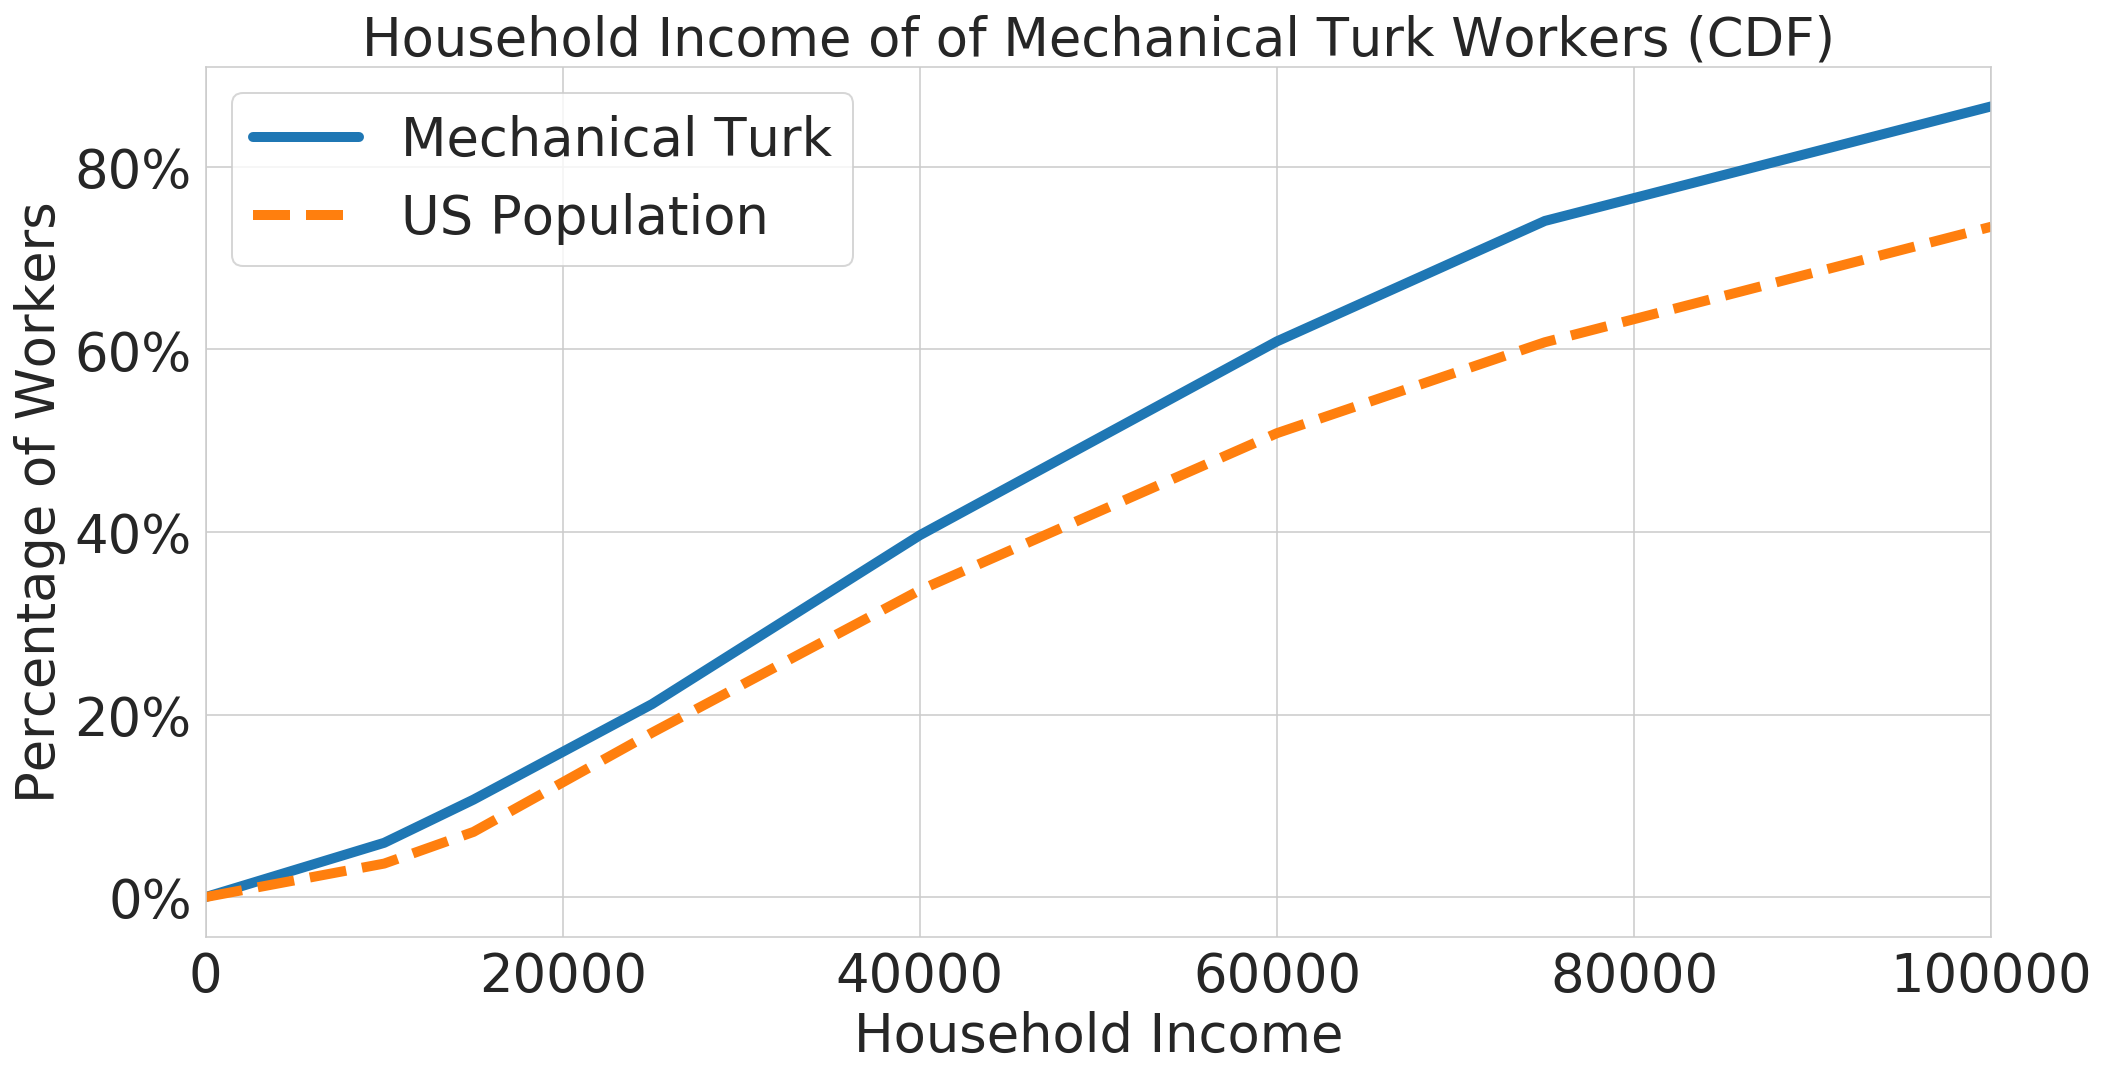

In [79]:
ax = df_income['worker_id'].plot(fontsize='large', linewidth=5)
ax = df_income['US Population'].plot(fontsize='large', linewidth=5, linestyle='--', ax = ax)

fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
ax.set_xlim([0,100000])


ax.set_title("Household Income of of Mechanical Turk Workers (CDF)", fontsize='large')
ax.set_xlabel("Household Income", fontsize='large')
ax.set_ylabel("Percentage of Workers", fontsize='large')

ax.legend(['Mechanical Turk', 'US Population'], fontsize='large')

fig = ax.get_figure()
fig.savefig('plots/income.pdf', bbox_inches='tight')

In [80]:
hhincome_table = pd.crosstab(index=df.date, columns=df.household_income, 
                           values='worker_id', aggfunc=np.count_nonzero, normalize='index')

status = sorted(set(df.household_income))

# Reconfiguring the order
status[0],  status[1], status[7] = status[7], status[0], status[1]
status

['Less than 10,000',
 '10,000-14,999',
 '15,000-24,999',
 '25,000-39,999',
 '40,000-59,999',
 '60,000-74,999',
 '75,000-99,999',
 '100,000 or more']

In [ ]:
fm = hhincome_table[sorted(status)].ewm(span=30).mean()
fs = hhincome_table[sorted(status)].ewm(span=30).std() 
plt.figure(figsize = (30,20))
plt.tick_params(labelsize=30)

incomes = [fm[d] for d in status]

plt.stackplot(fm.index, incomes, alpha=0.75)
plt.ylim([0.0,1.0])

ax = plt.gca()
ax.set_title("Household Income", fontsize='x-large', y=1.05)
ax.set_ylabel("Percentage of Workers", fontsize='x-large')
ax.set_xlabel("Date", fontsize='x-large')


legend = []
for stat in status:
    s = stat.replace('$','')
    legend.append(s)
    
ax.legend(legend, fontsize='x-large', fancybox=True, frameon = True, loc="upper center", ncol=4, 
         bbox_to_anchor=(0.5, -0.15))